In [1]:
import pandas
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [3]:
plt.rcParams["figure.max_open_warning"] = 200

In [4]:
virii=pandas.read_csv('20181214-1000genomes-unmapped-virii-virii_details.csv', sep="\t", header=None, 
                      names=["accession","description"],
                      index_col=["accession"])
virii.head()

,description
accession,
AB513134.1,"Human T-lymphotropic virus 1 proviral DNA, com..."
AB618031.1,"Herpes simplex virus (type 1 /strain RH2) DNA,..."
AF037218.1,"Human herpesvirus 7 strain RK, complete genome"
AF148805.2,"Human herpesvirus 8 strain GK18, complete genome"
AP015015.1,"Human herpesvirus 4 DNA, complete genome, stra..."


In [5]:
conn = sqlite3.connect("20181214-1000genomes-unmapped-virii-viral_mapped_unmapped.2500.1.sqlite3")
df = pandas.read_sql_query("SELECT * FROM subjects", conn)
df.head()

,subject,unmapped,mapped,total,AB513134_1,AB513134_1_unmapped,AB513134_1_total,uncommon_AB513134_1,uncommon_AB513134_1_unmapped,uncommon_AB513134_1_total,...,X83413_2_total,uncommon_X83413_2,uncommon_X83413_2_unmapped,uncommon_X83413_2_total,Z86099_2,Z86099_2_unmapped,Z86099_2_total,uncommon_Z86099_2,uncommon_Z86099_2_unmapped,uncommon_Z86099_2_total
0,HG00096,2083467,145063589,147147056,0,0.0,0.0,0,0.0,0.0,...,0.000033,0,0.0,0.0,0,0.000000e+00,0.000000e+00,0,0.0,0.0
1,HG00097,1158537,298693620,299852157,0,0.0,0.0,0,0.0,0.0,...,0.000020,0,0.0,0.0,0,0.000000e+00,0.000000e+00,0,0.0,0.0
2,HG00099,1147814,247709161,248856975,0,0.0,0.0,0,0.0,0.0,...,0.000032,0,0.0,0.0,0,0.000000e+00,0.000000e+00,0,0.0,0.0
3,HG00100,13376337,408106230,421482567,0,0.0,0.0,0,0.0,0.0,...,0.000166,0,0.0,0.0,13,9.718655e-07,3.084351e-08,0,0.0,0.0
4,HG00101,1058895,217906779,218965674,0,0.0,0.0,0,0.0,0.0,...,0.000047,0,0.0,0.0,0,0.000000e+00,0.000000e+00,0,0.0,0.0


In [6]:
len(df)

2535

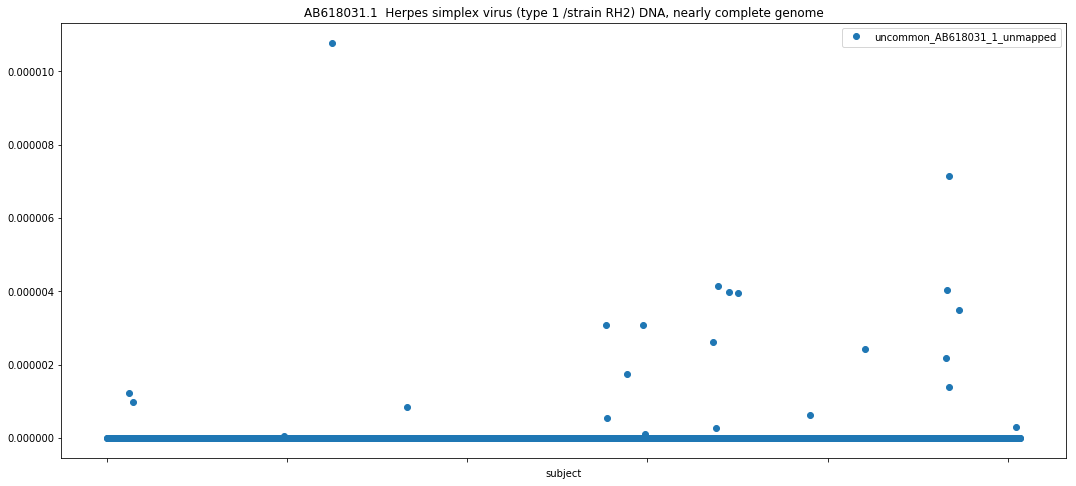

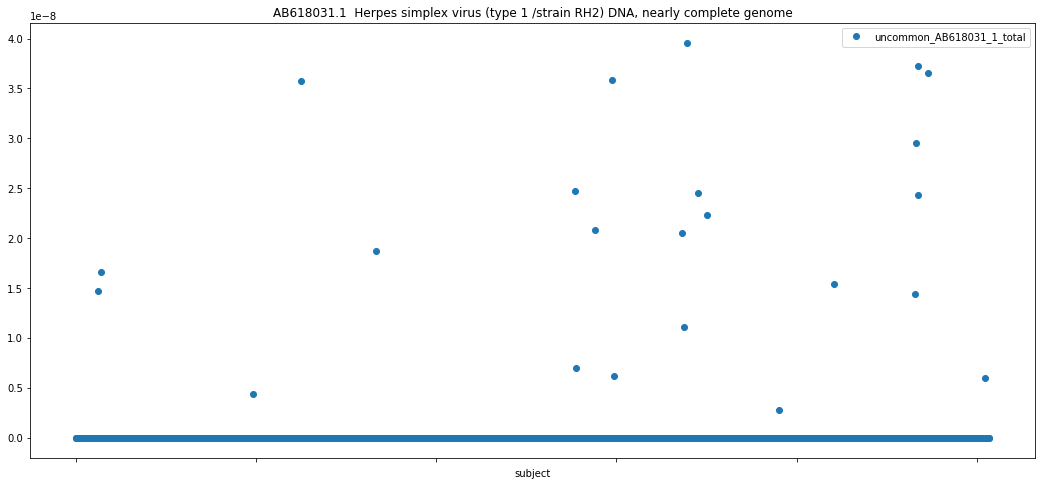

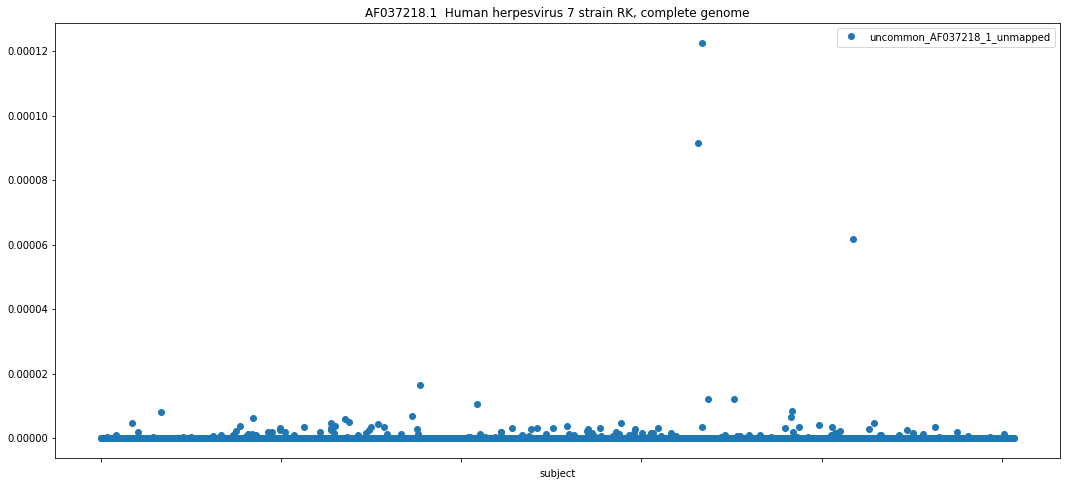

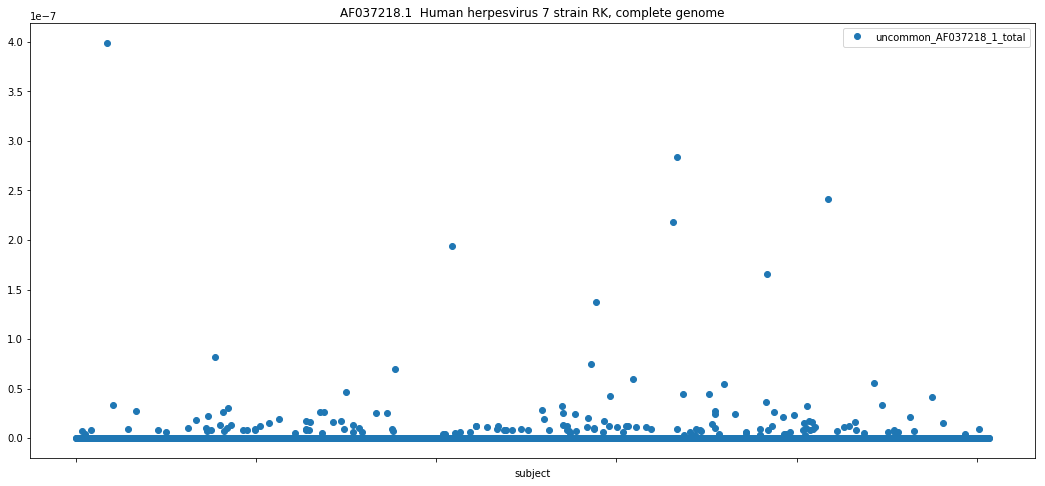

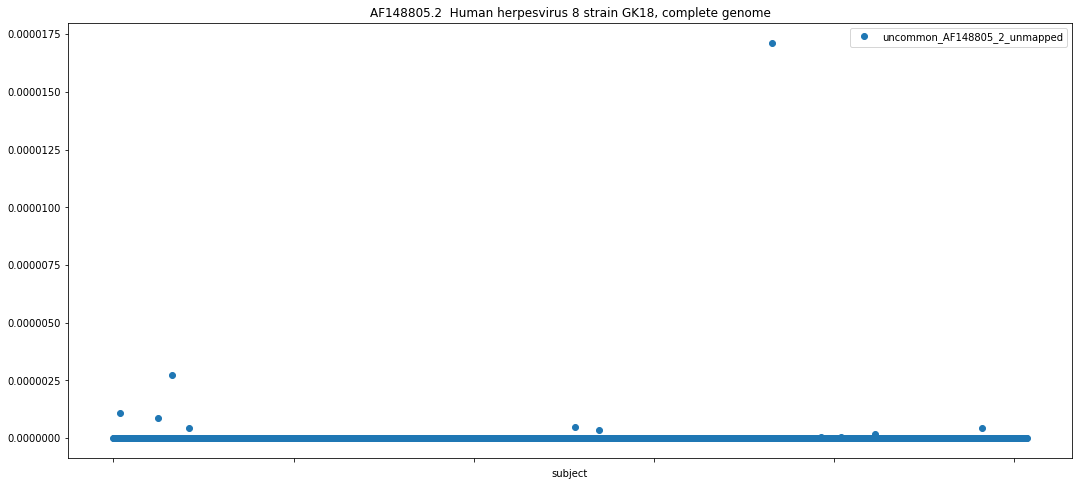

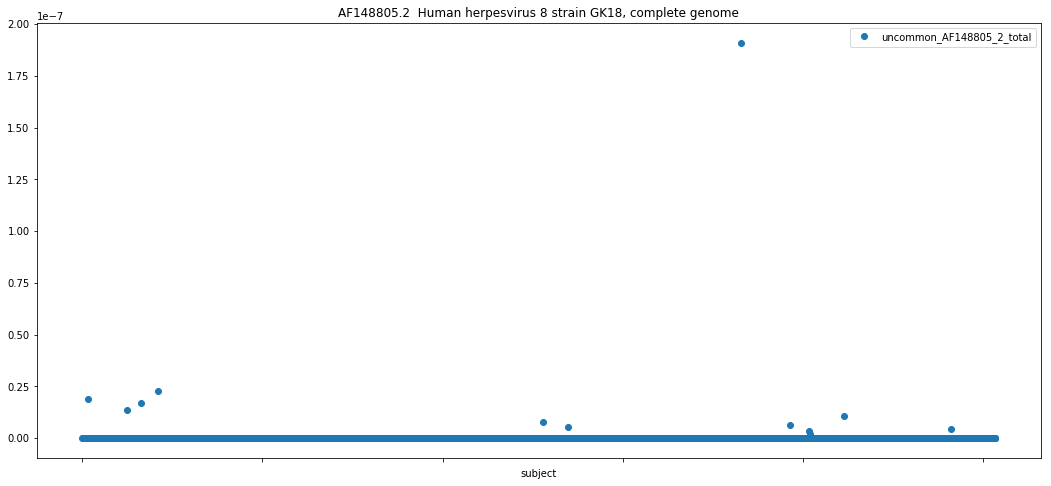

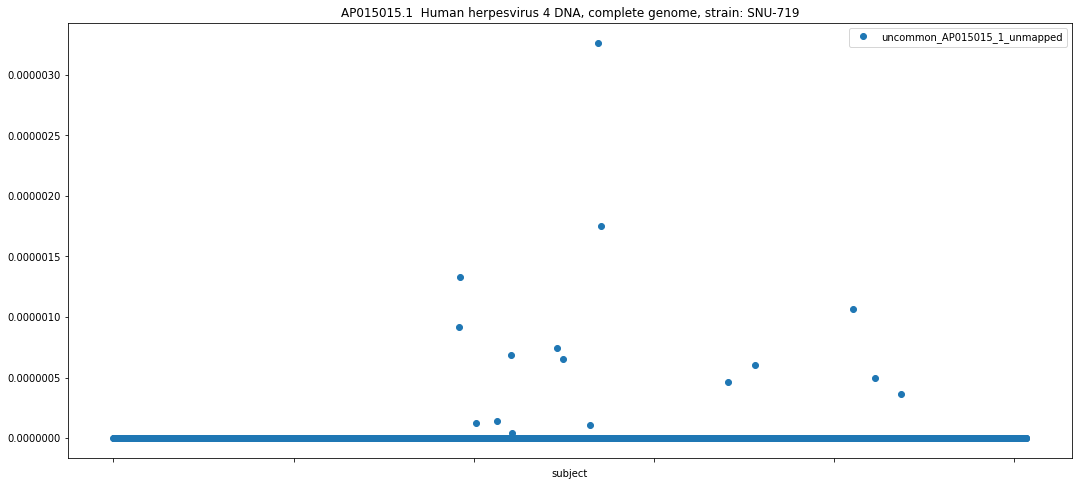

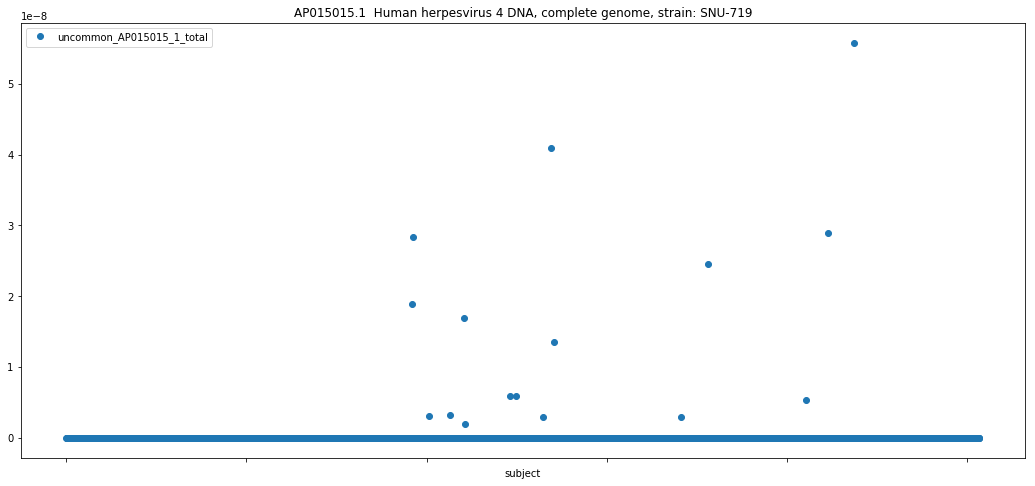

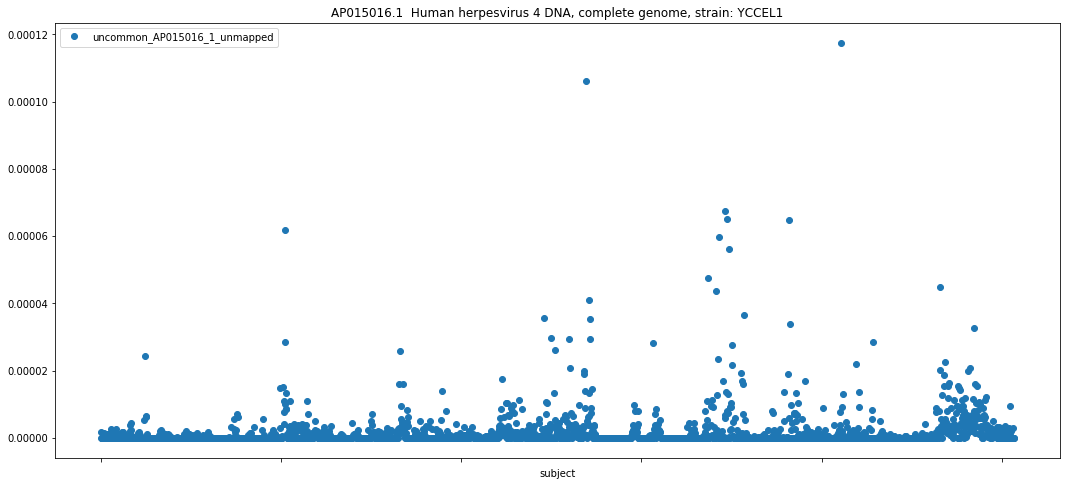

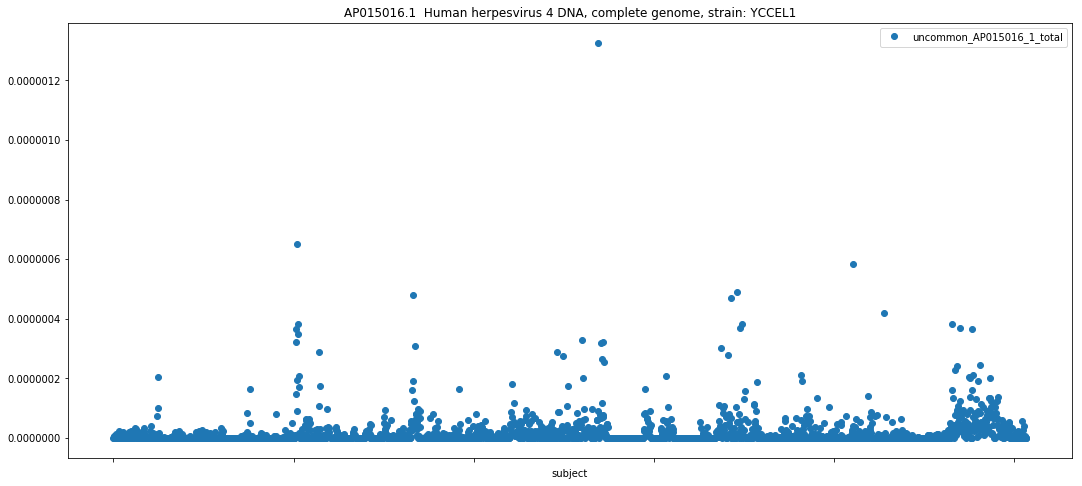

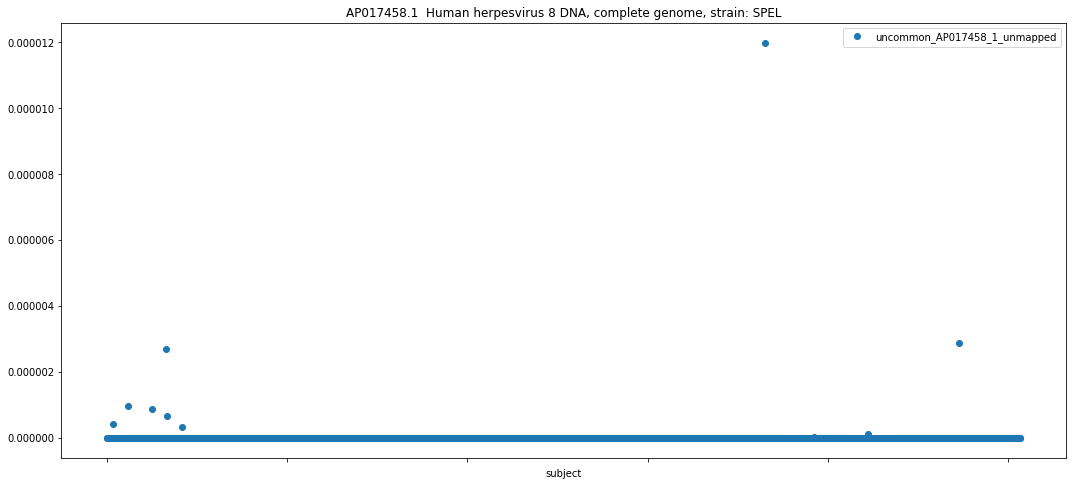

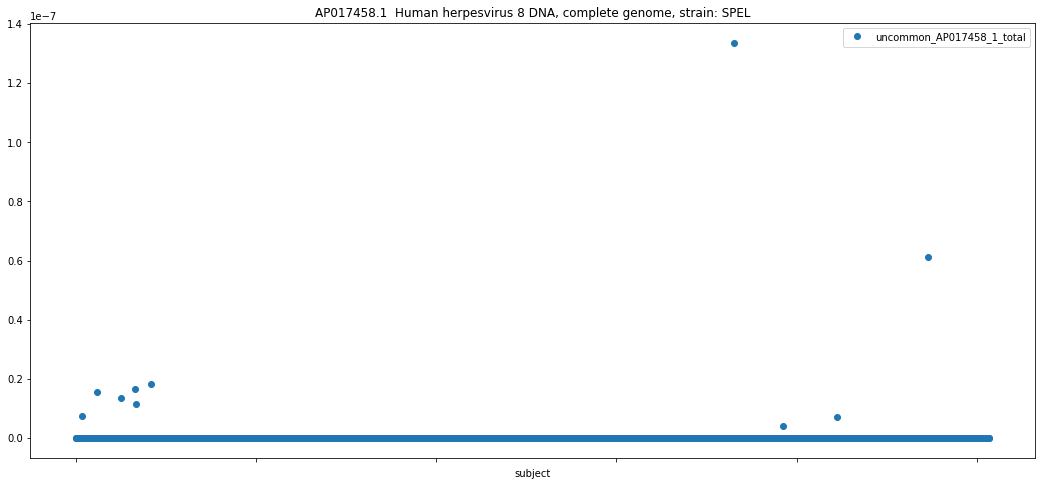

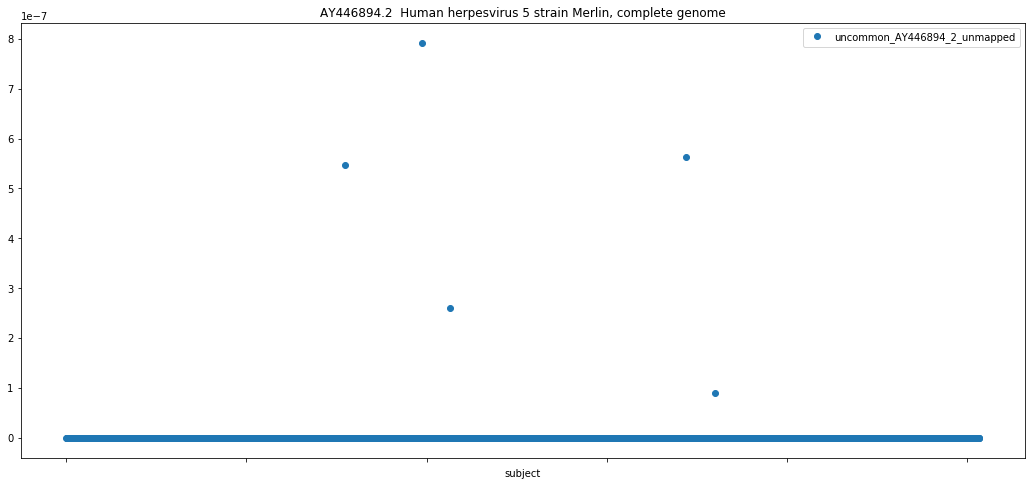

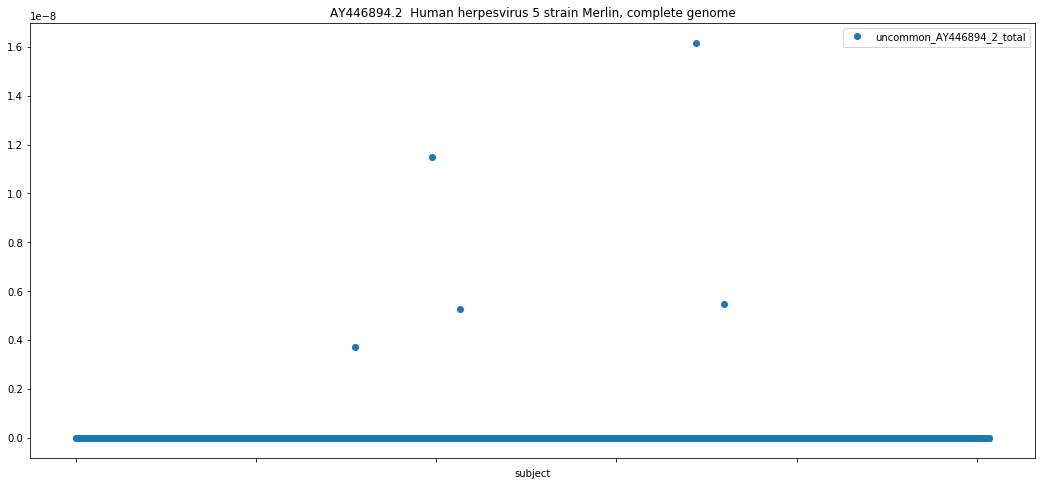

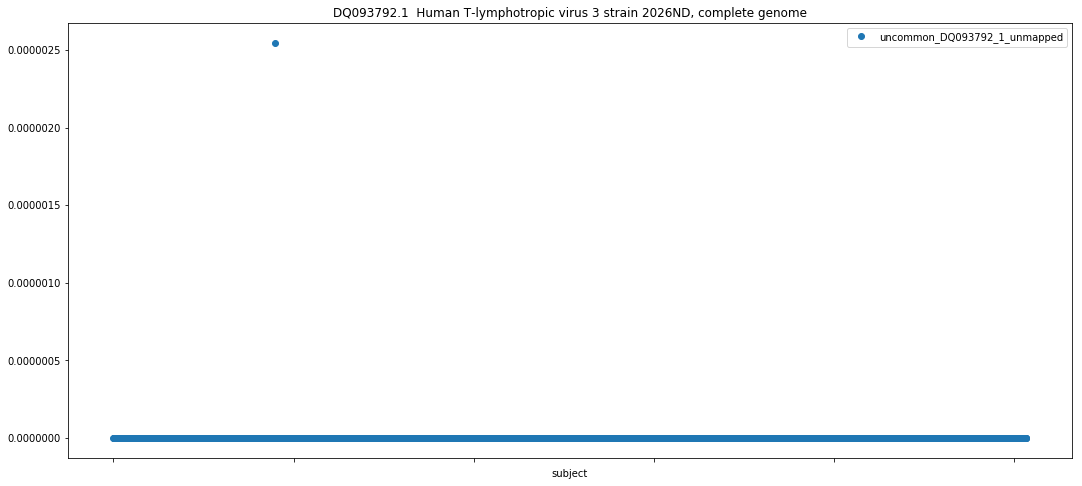

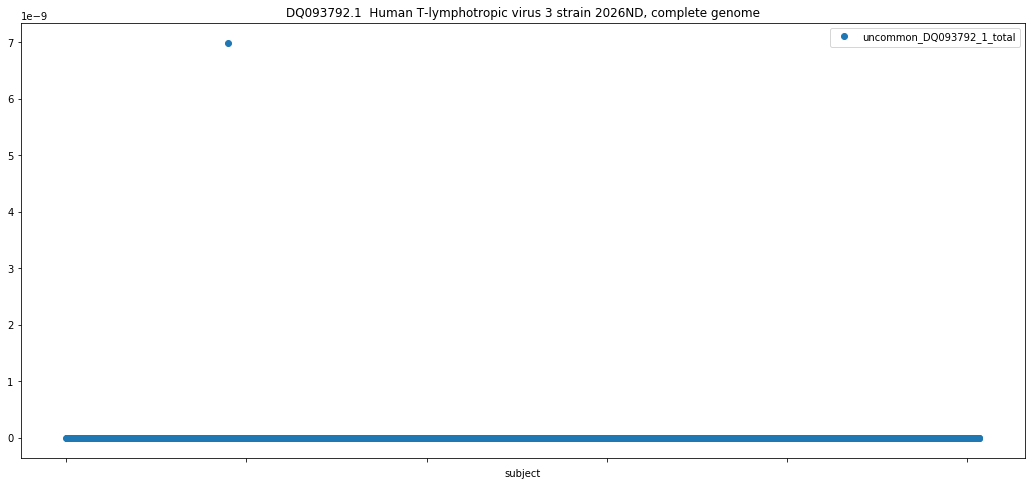

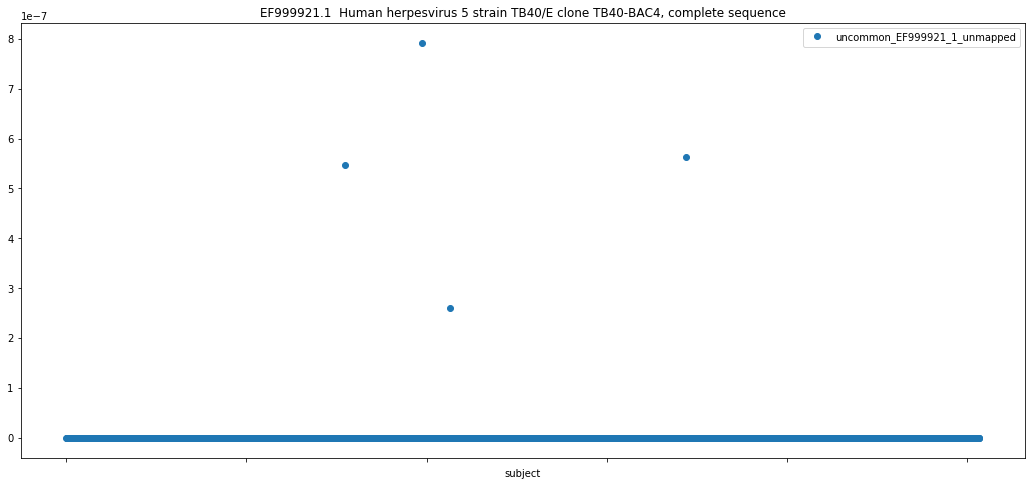

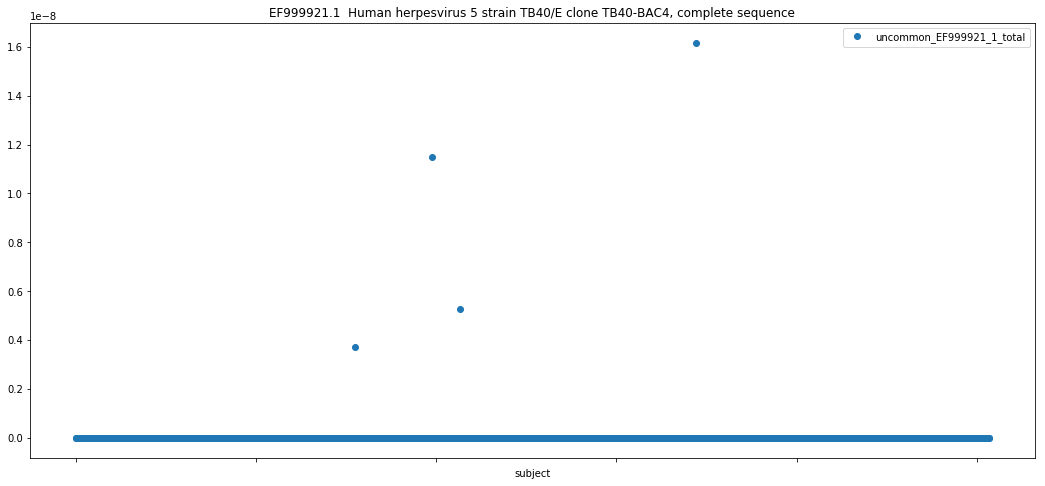

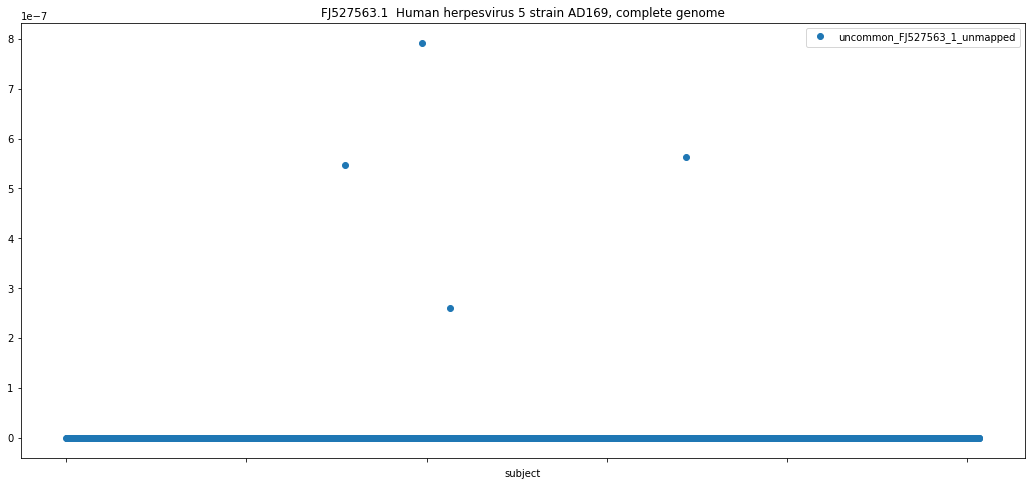

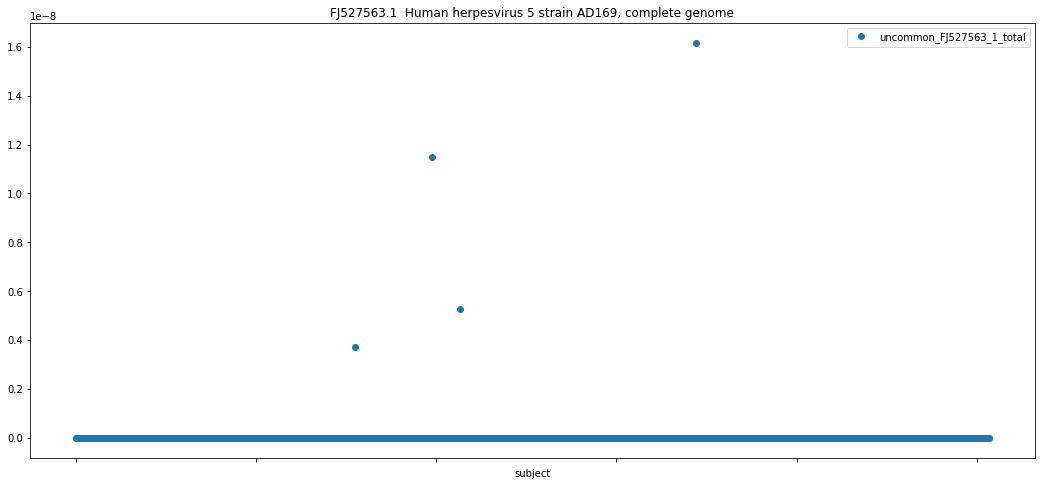

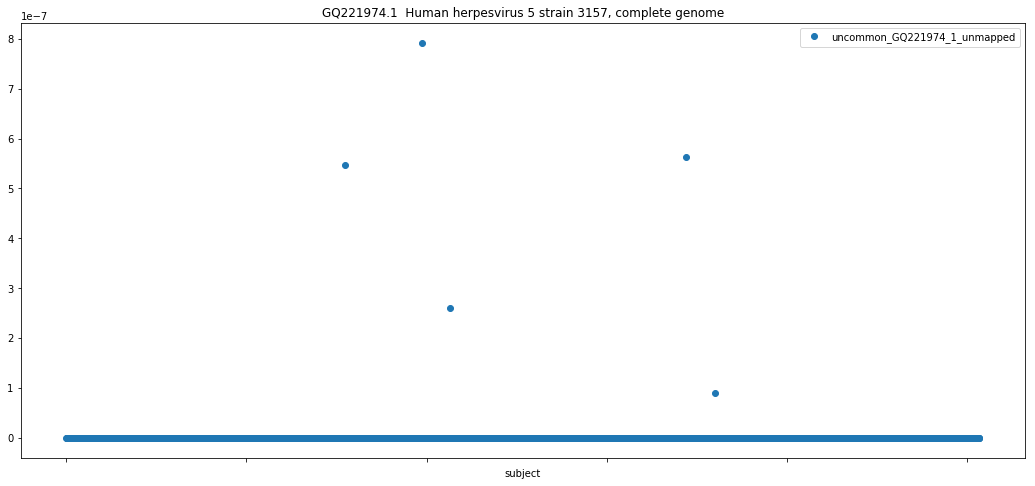

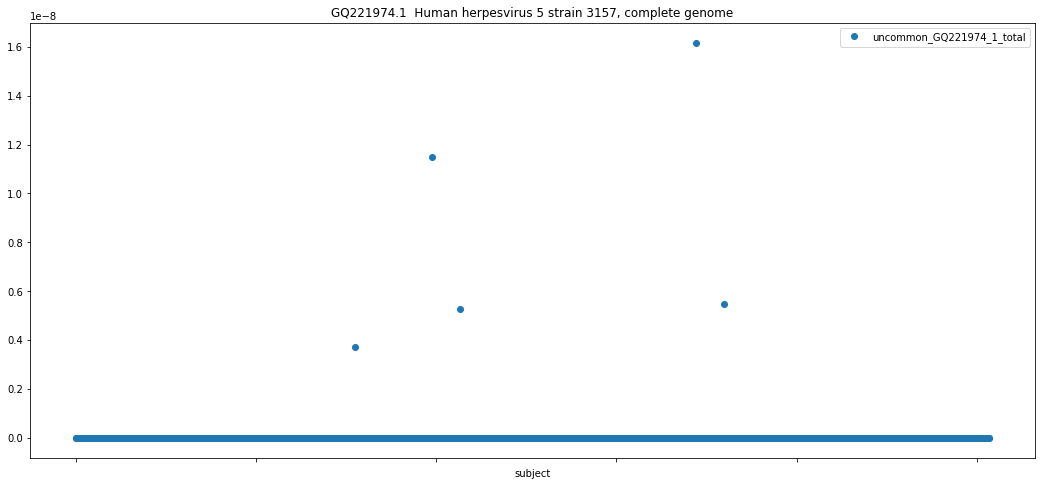

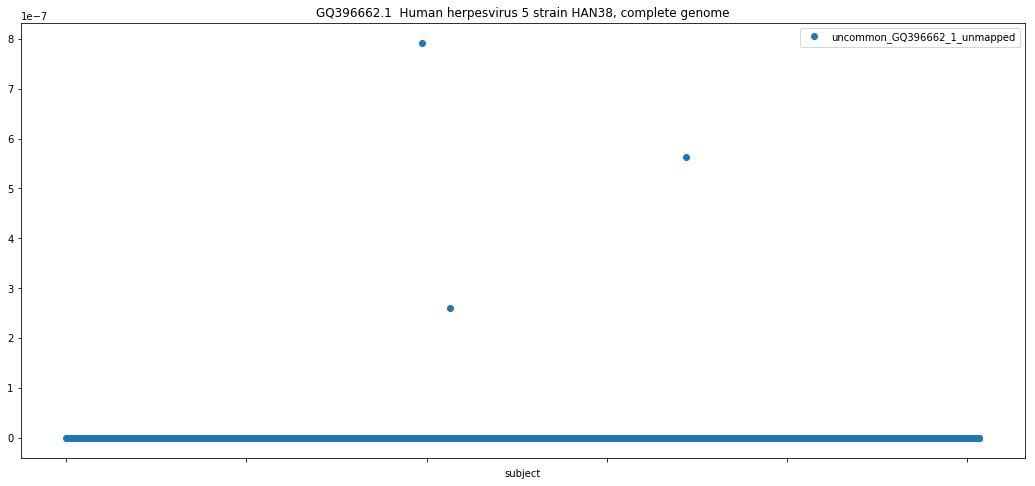

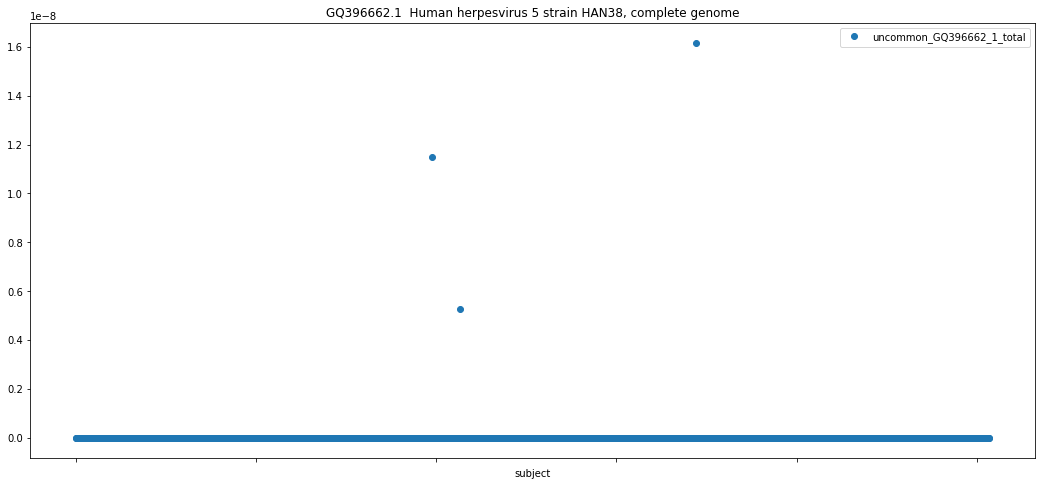

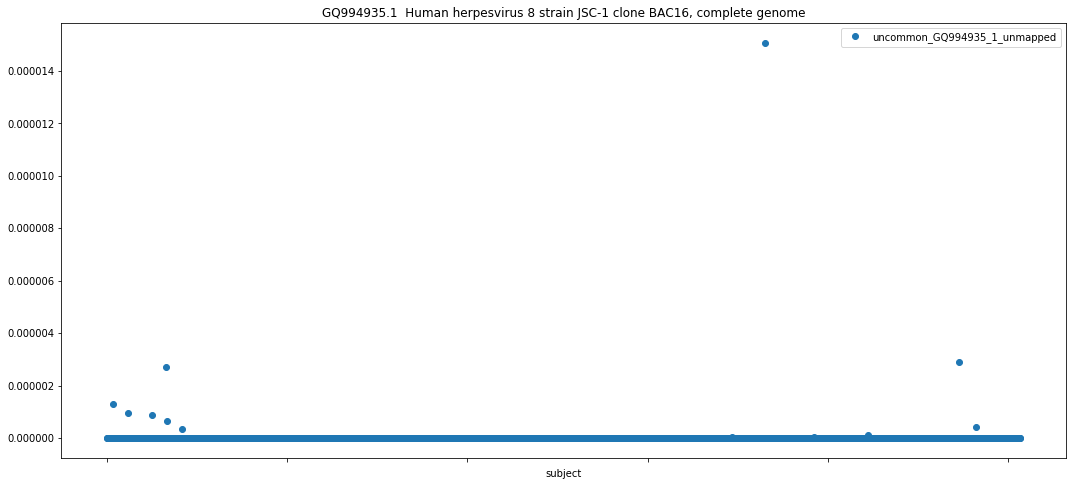

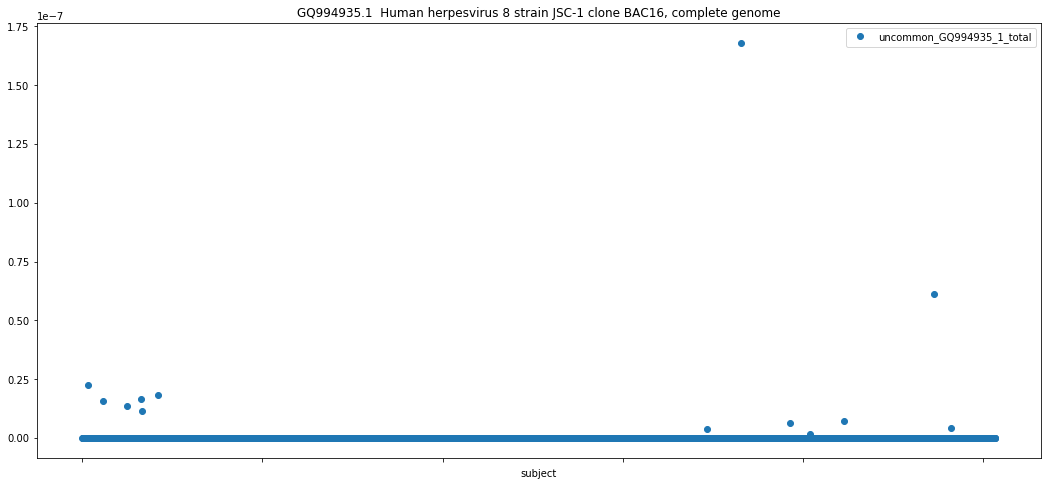

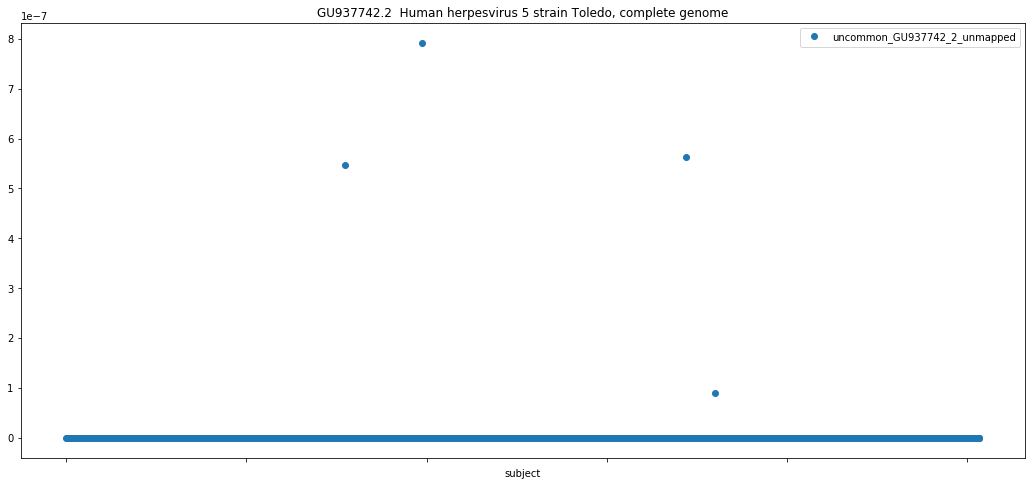

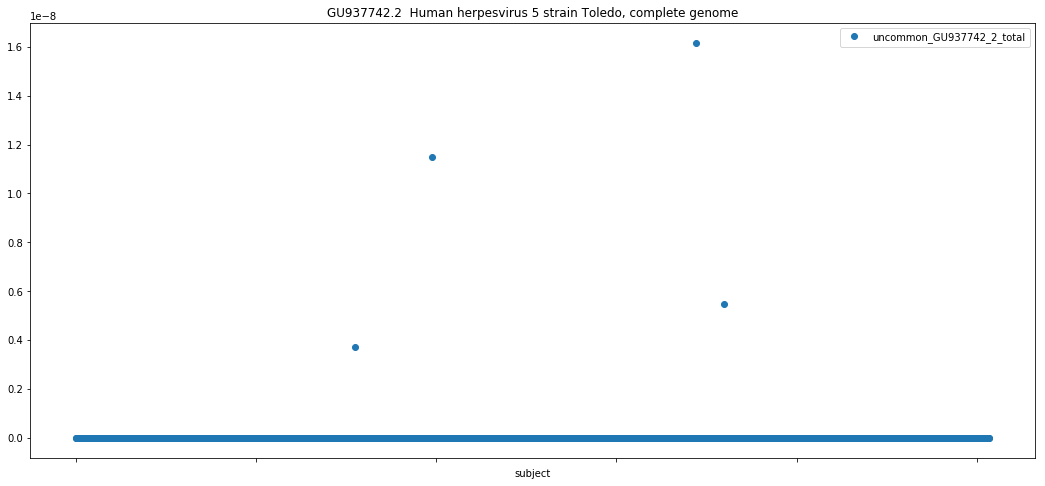

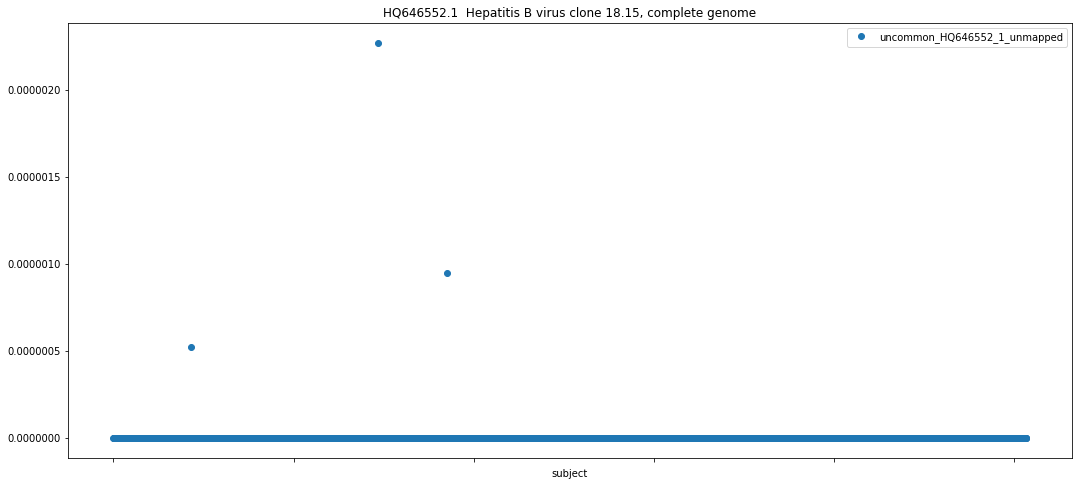

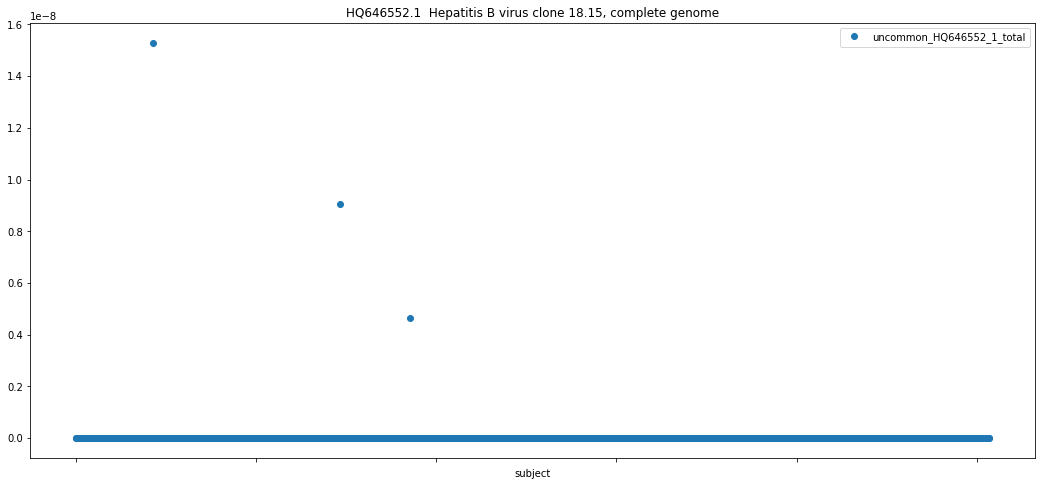

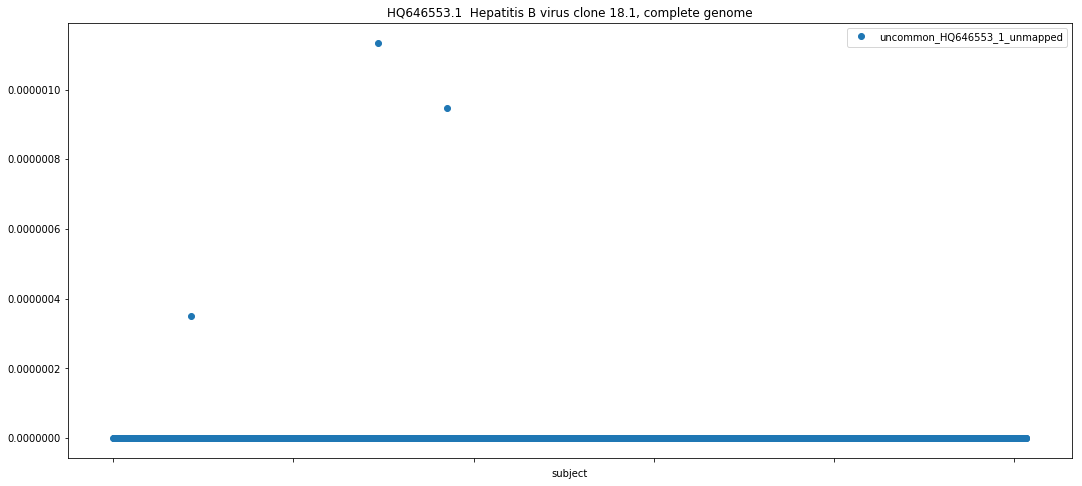

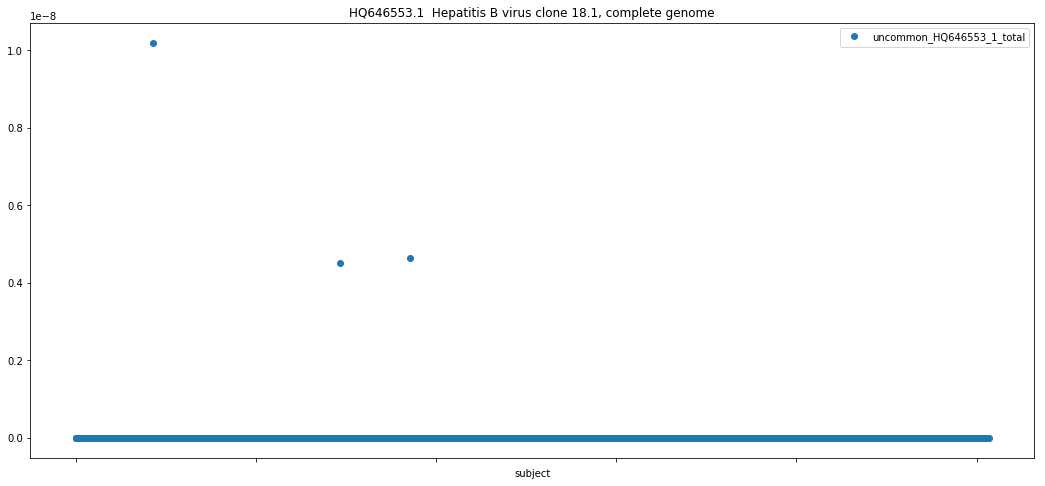

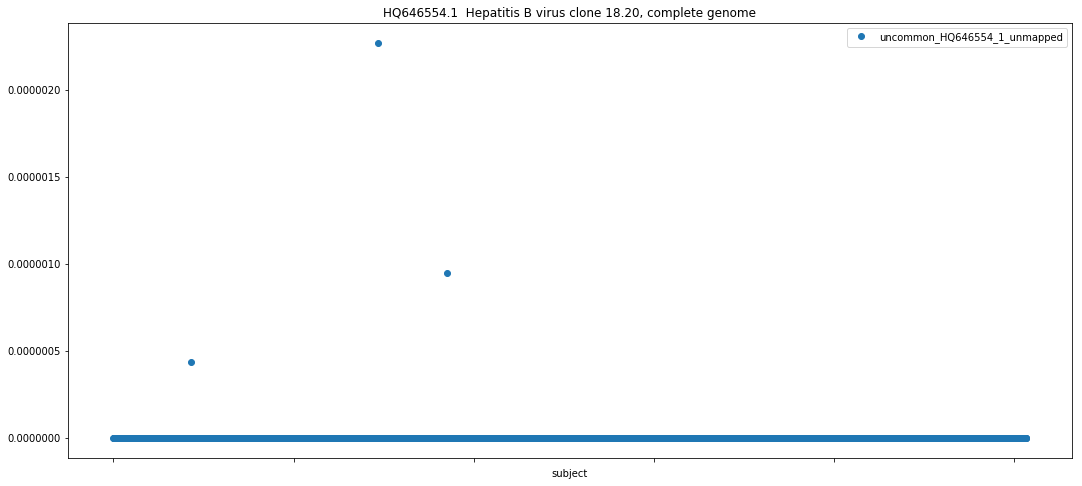

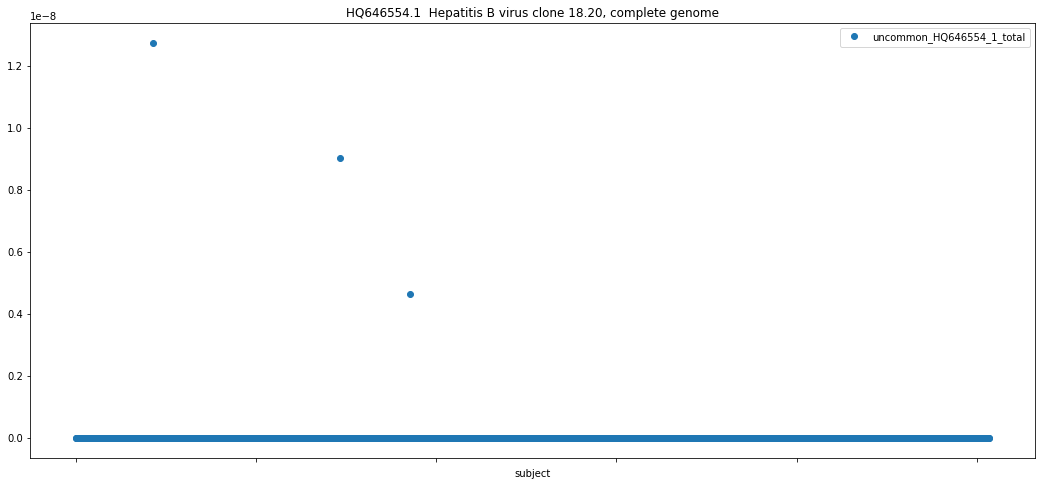

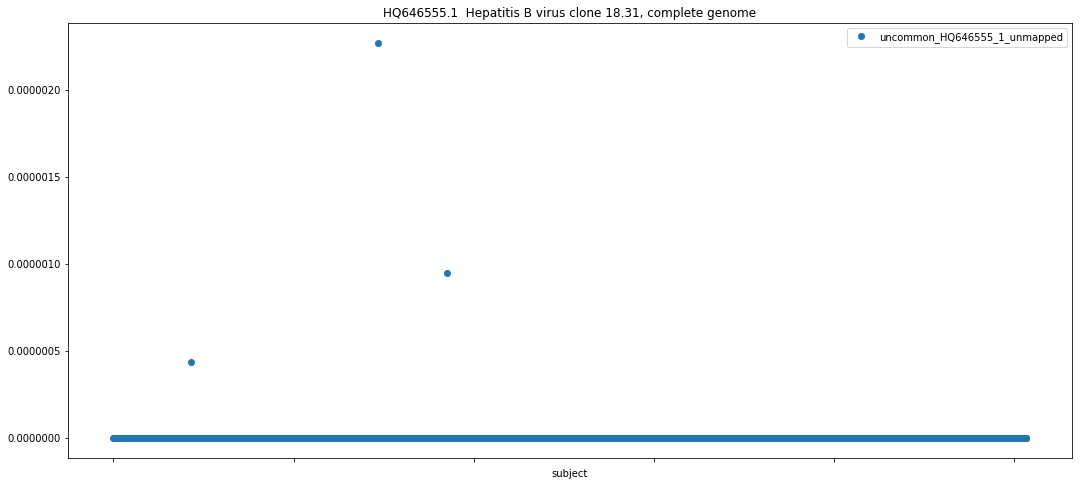

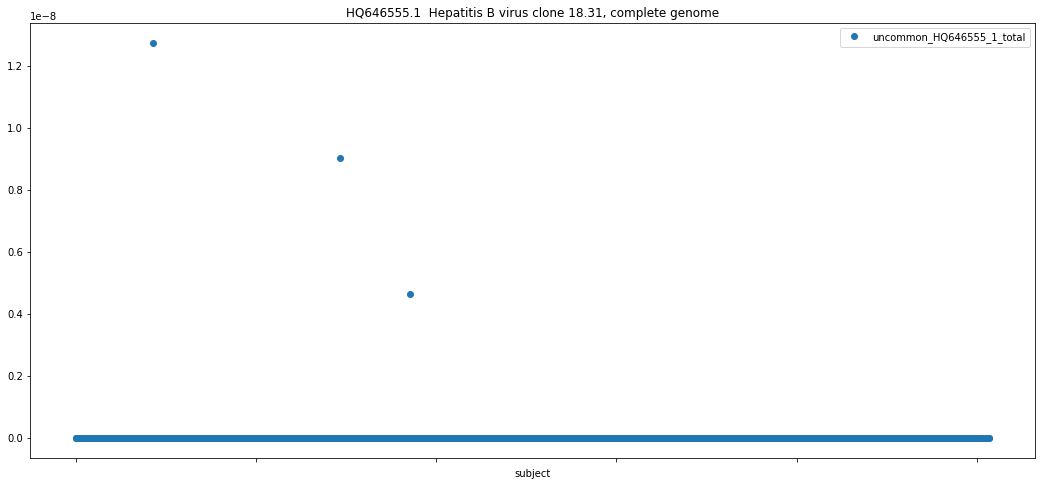

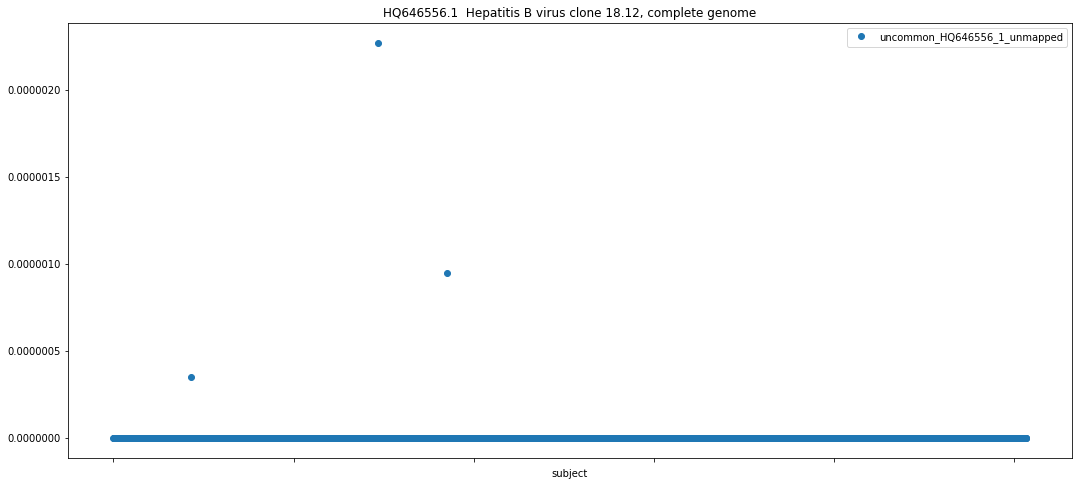

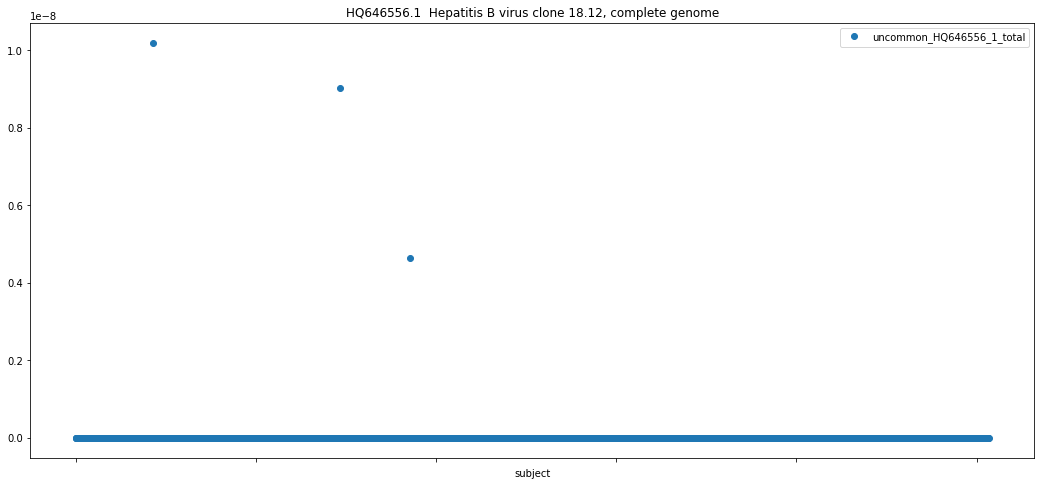

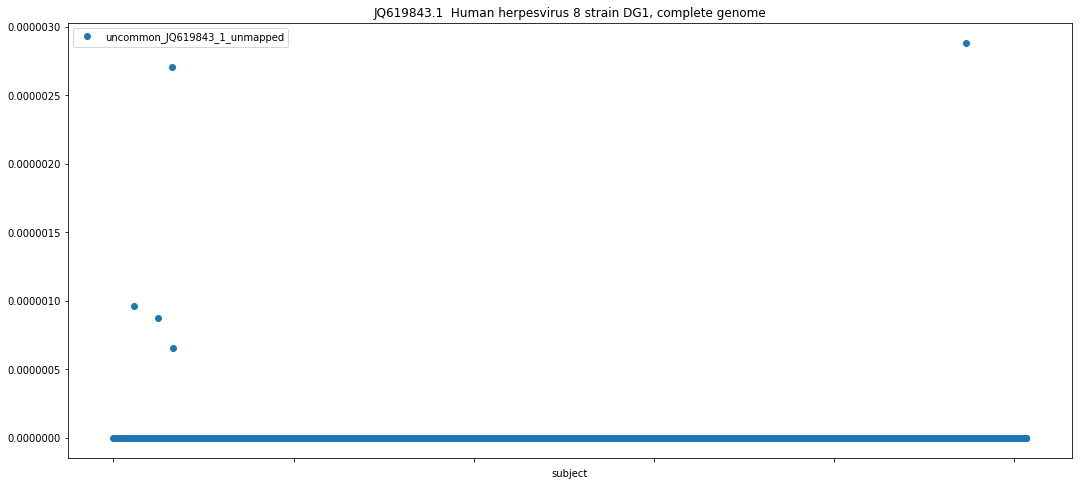

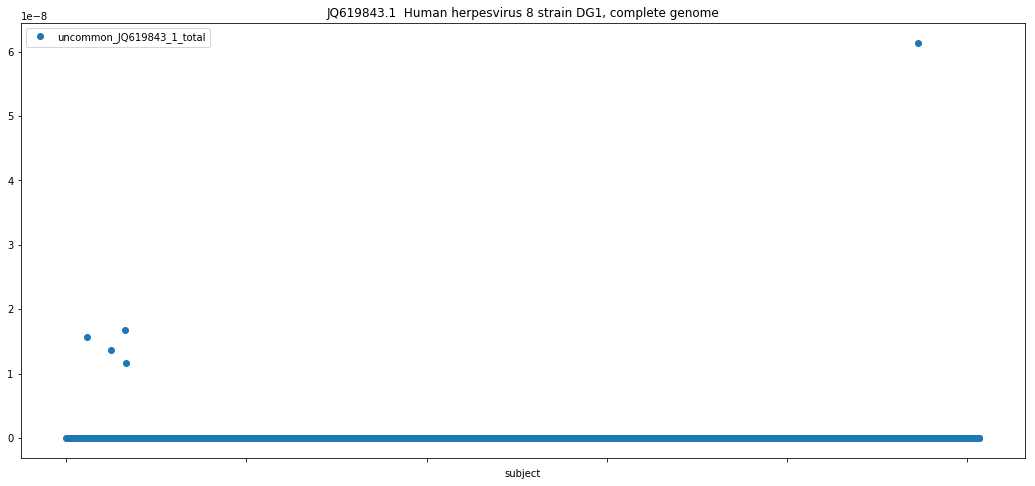

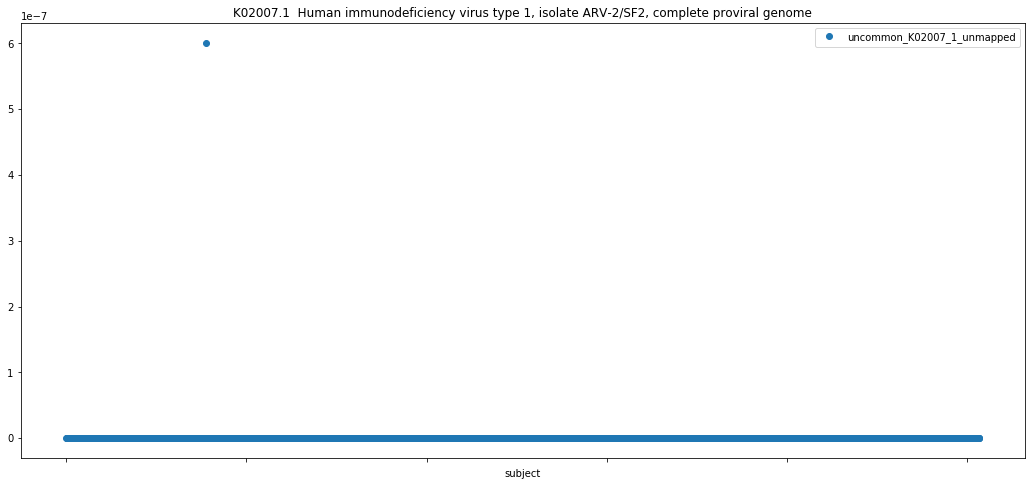

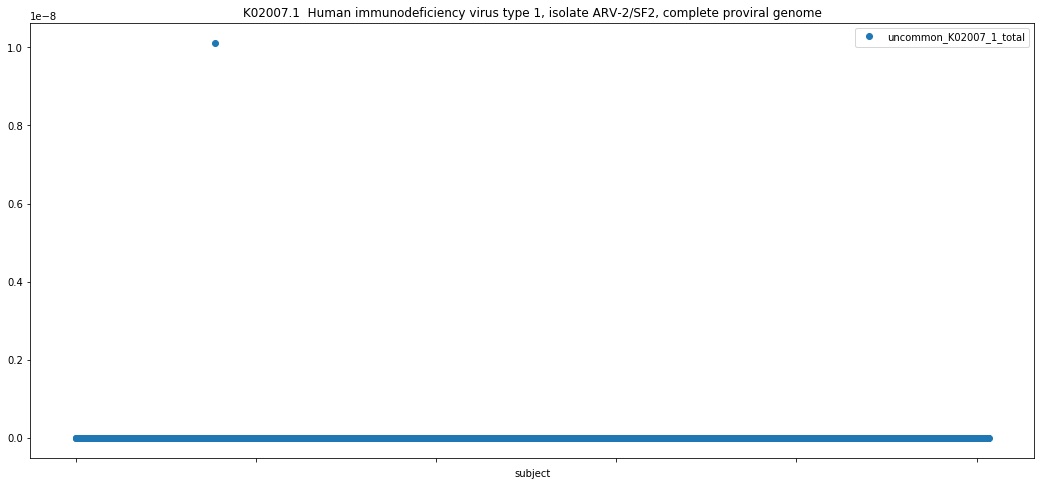

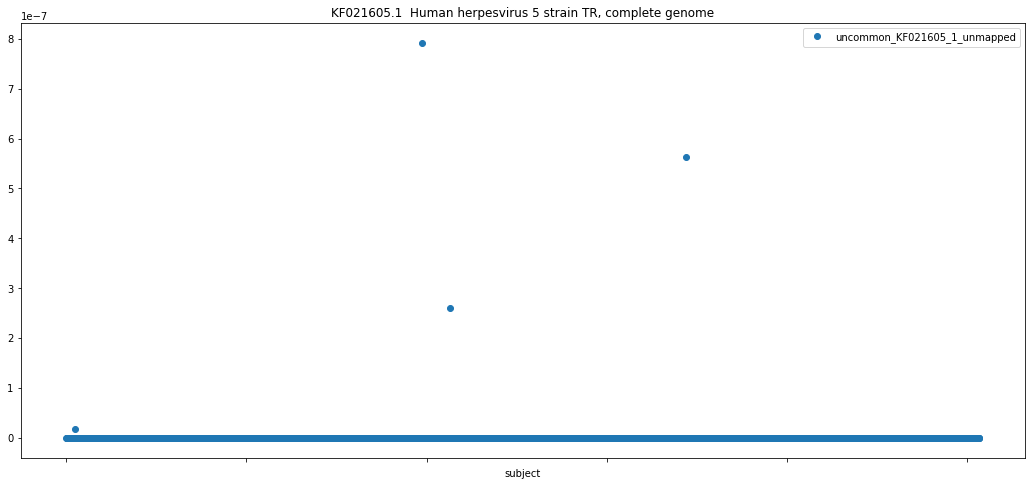

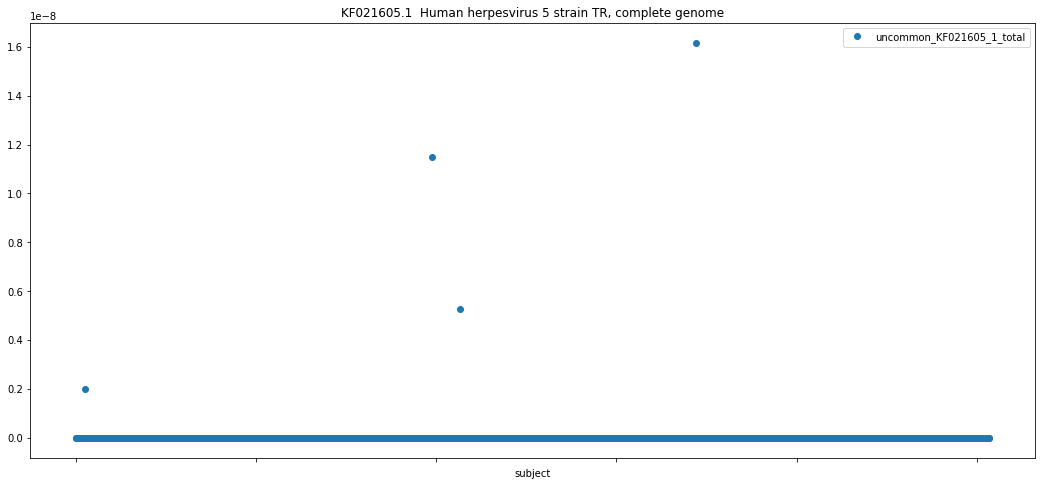

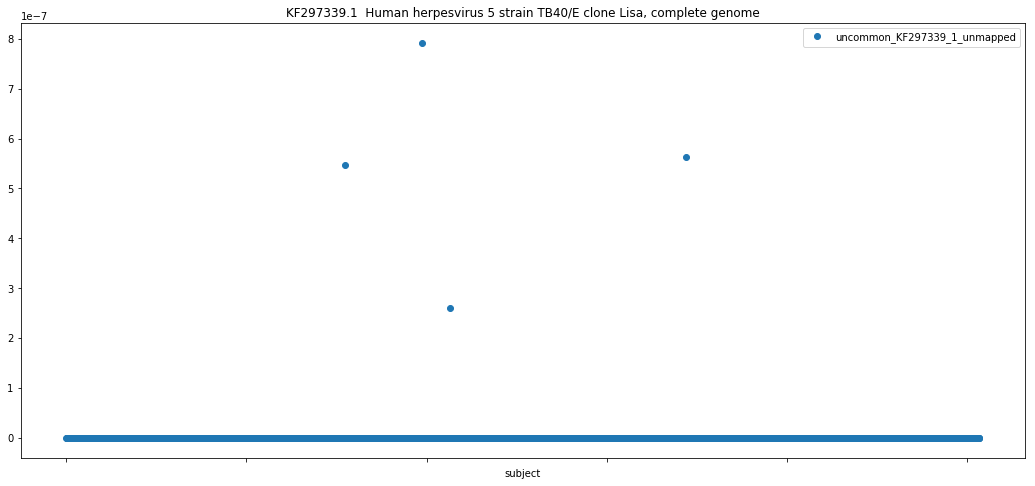

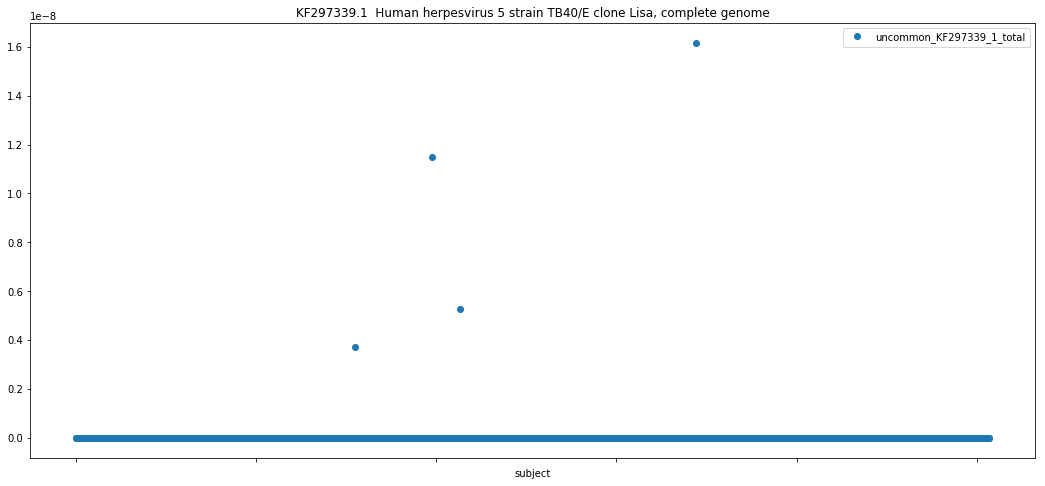

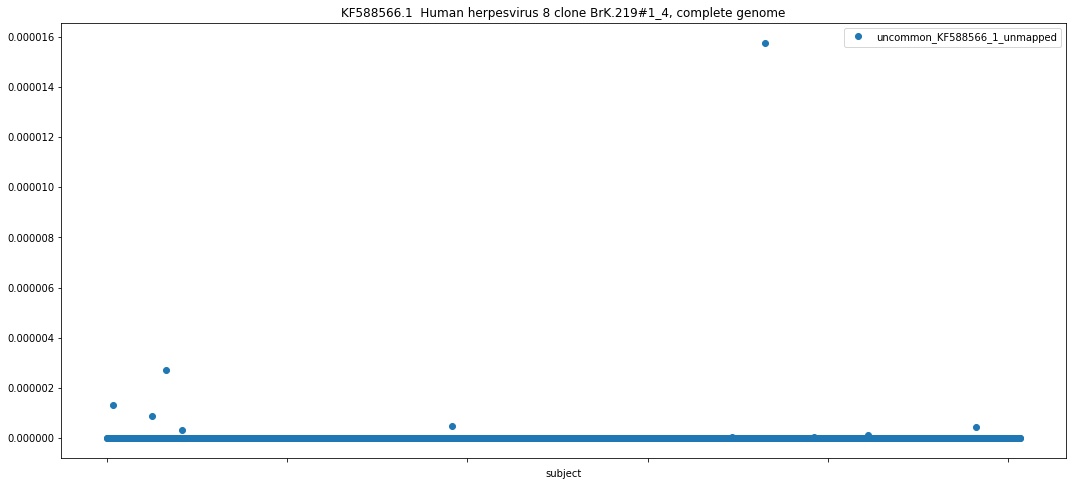

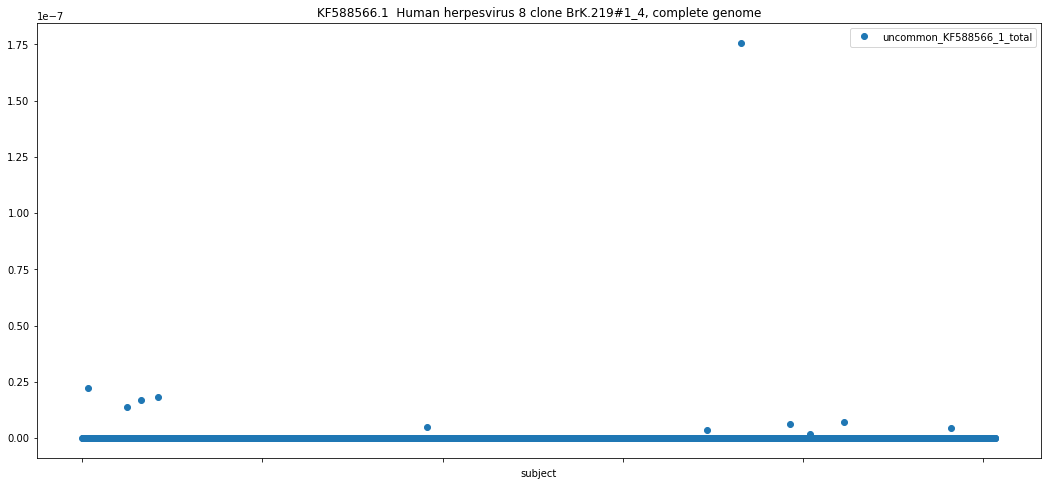

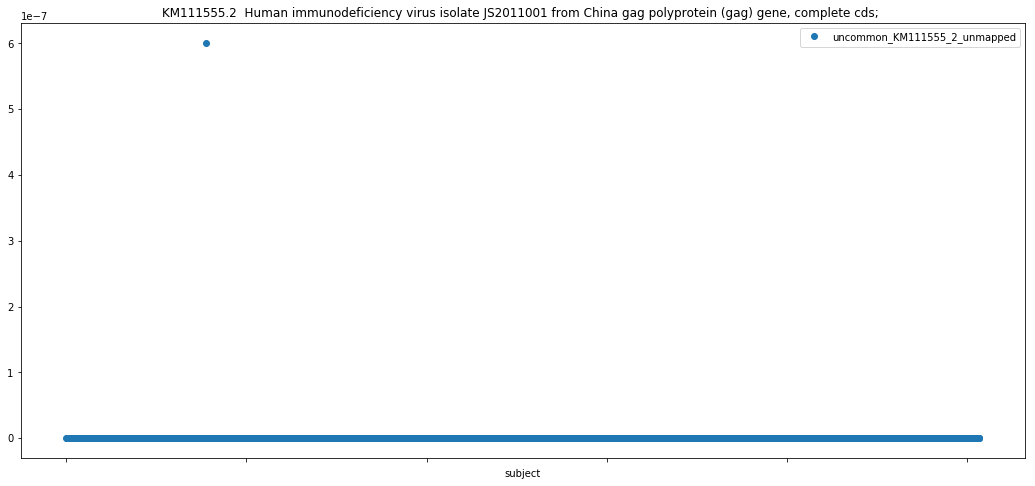

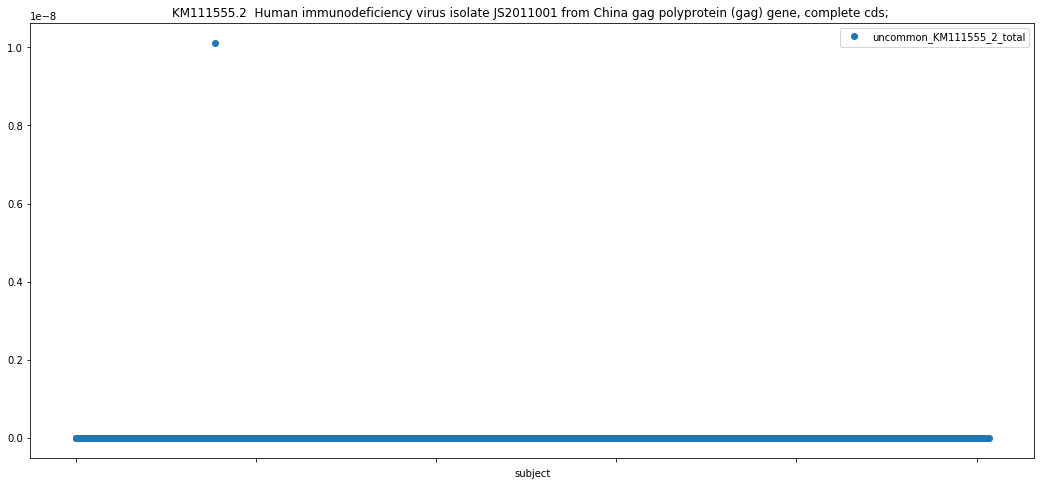

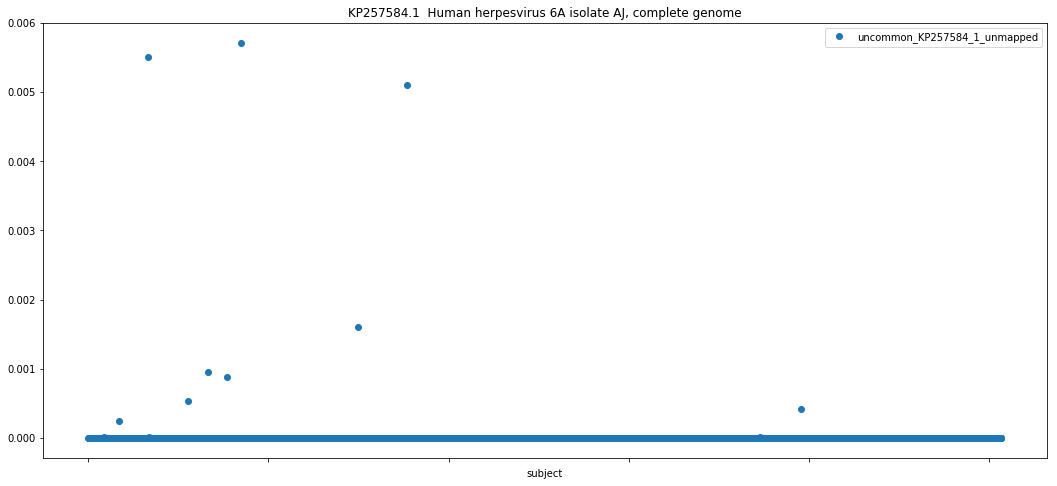

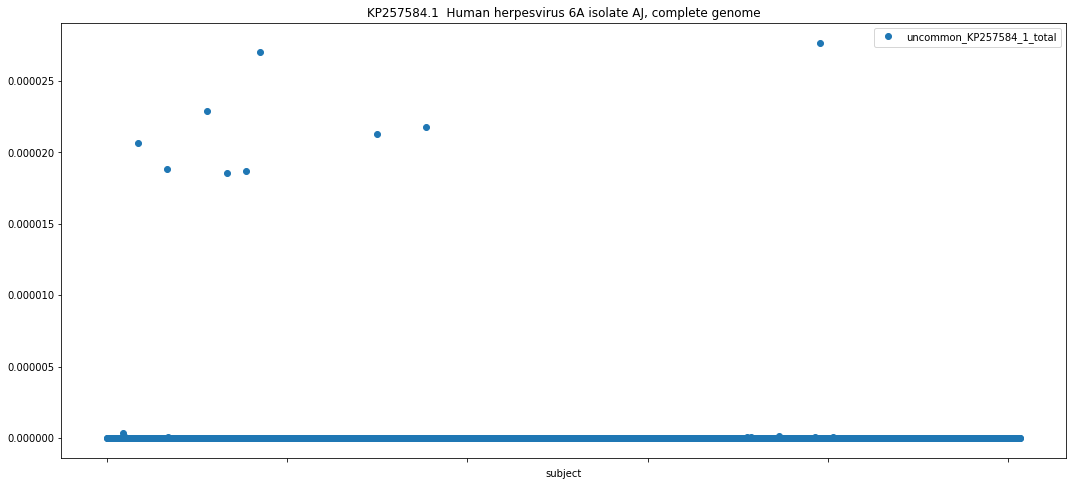

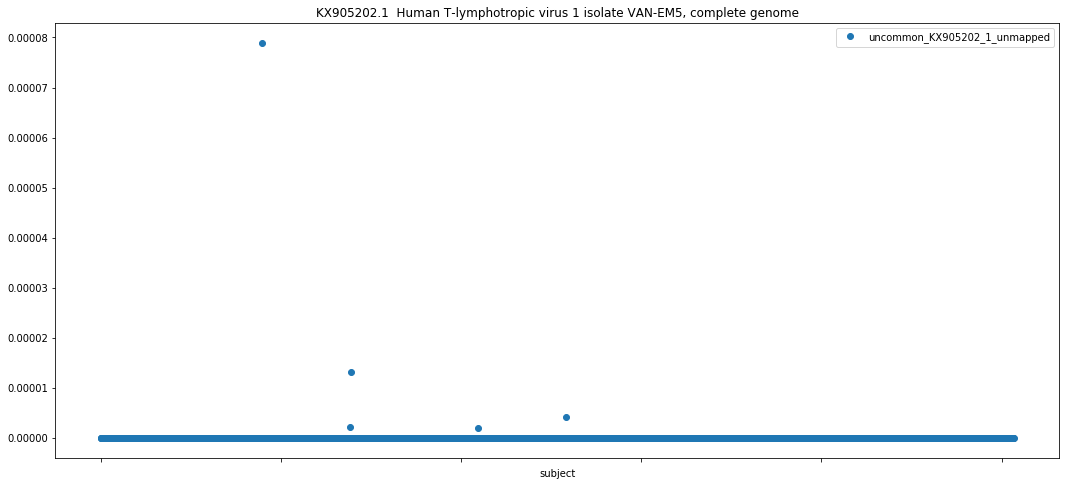

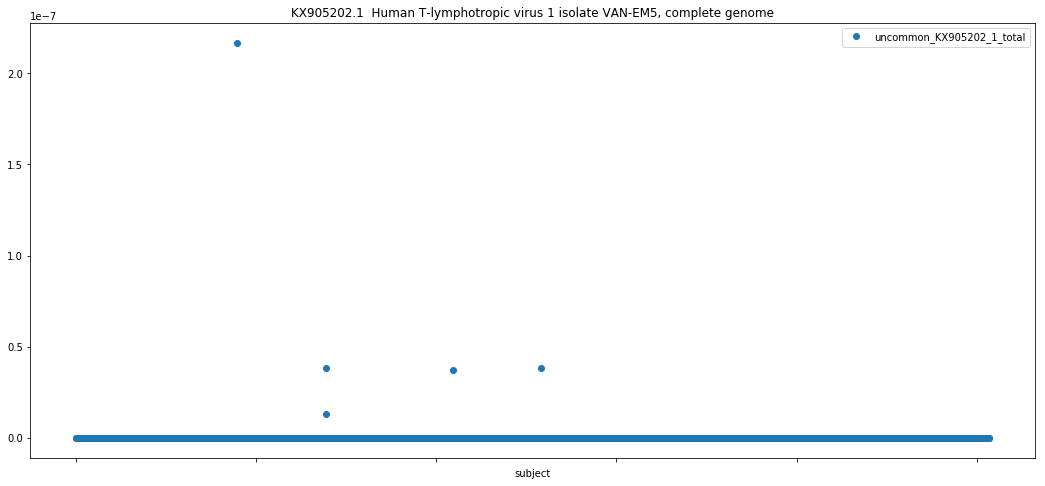

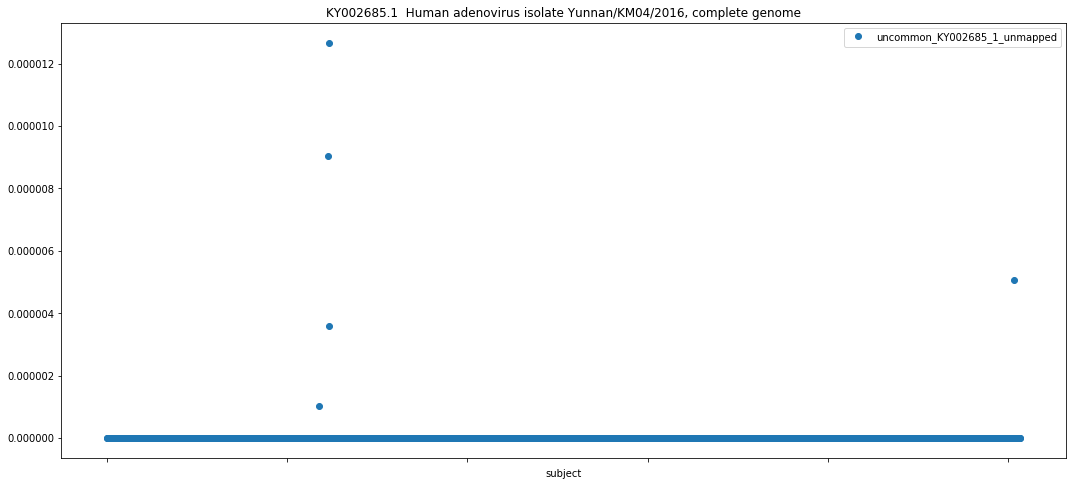

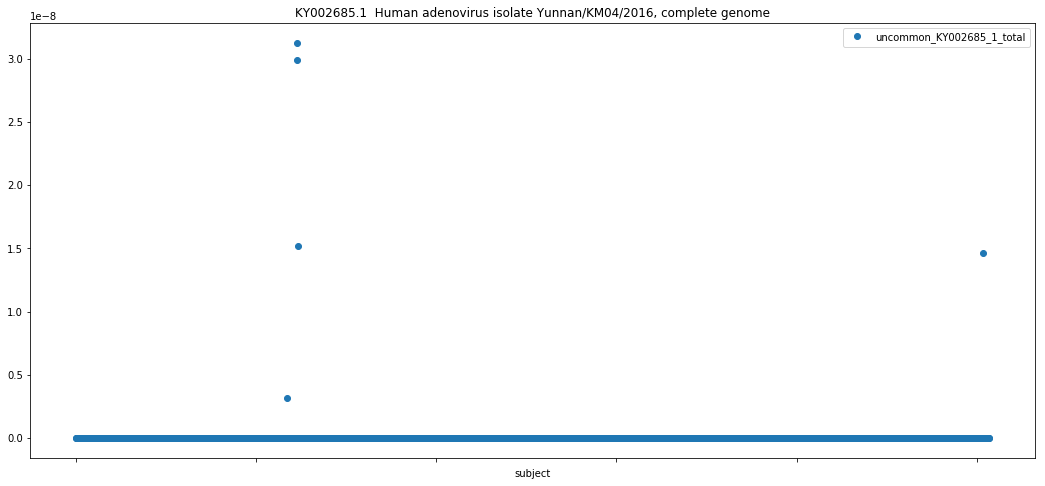

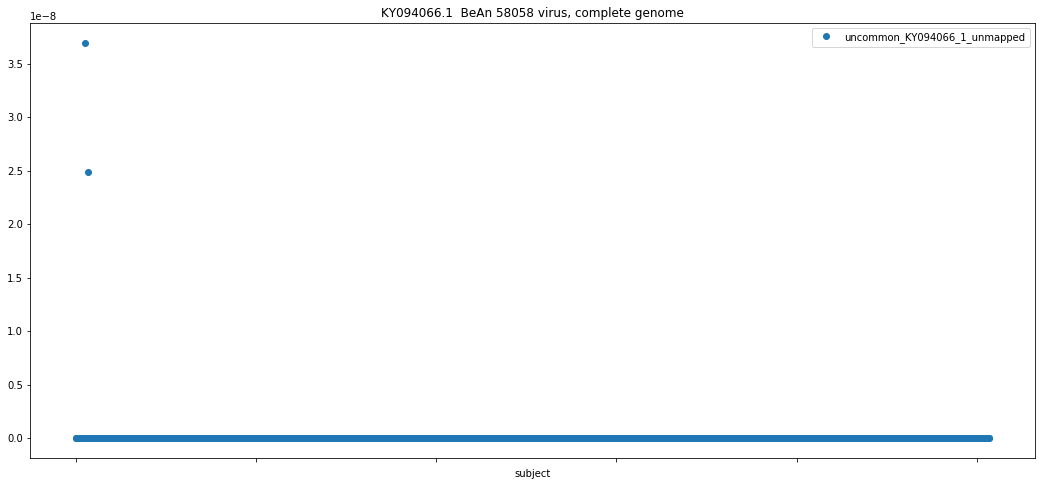

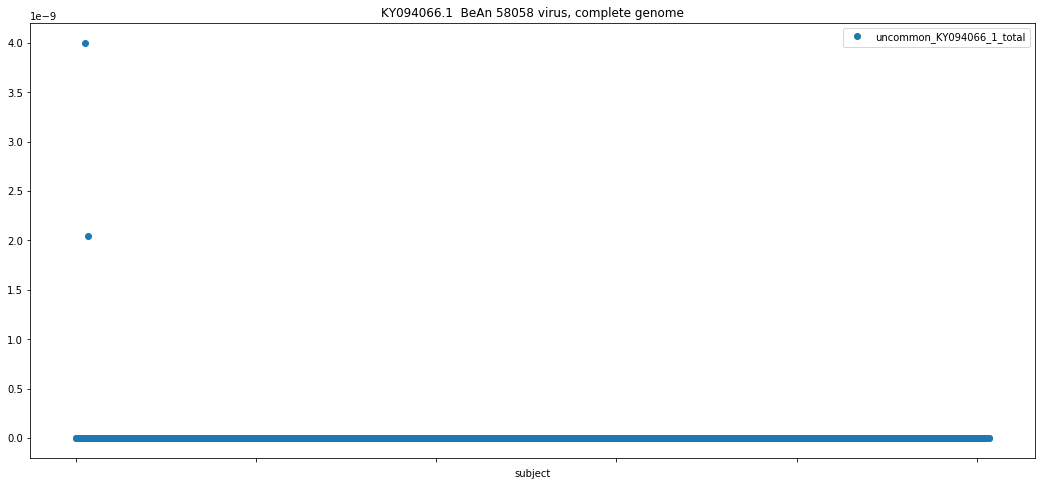

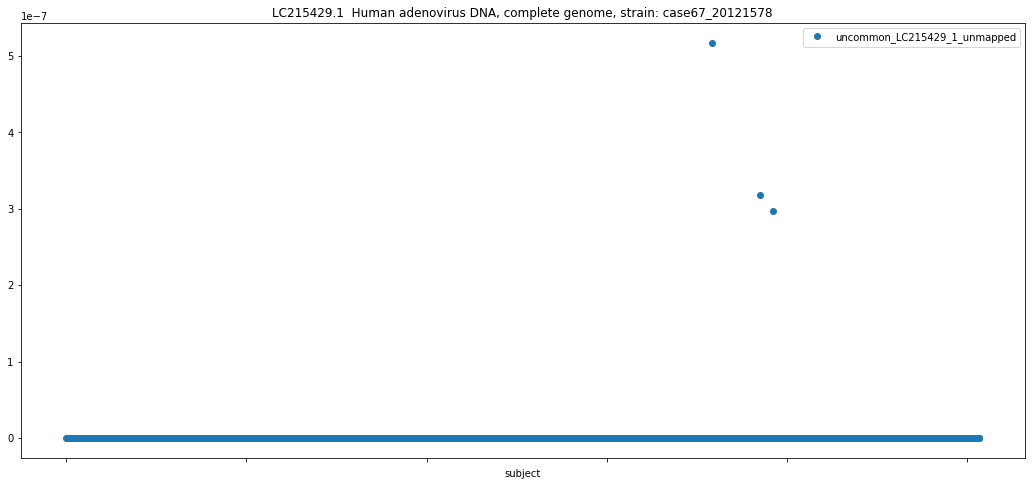

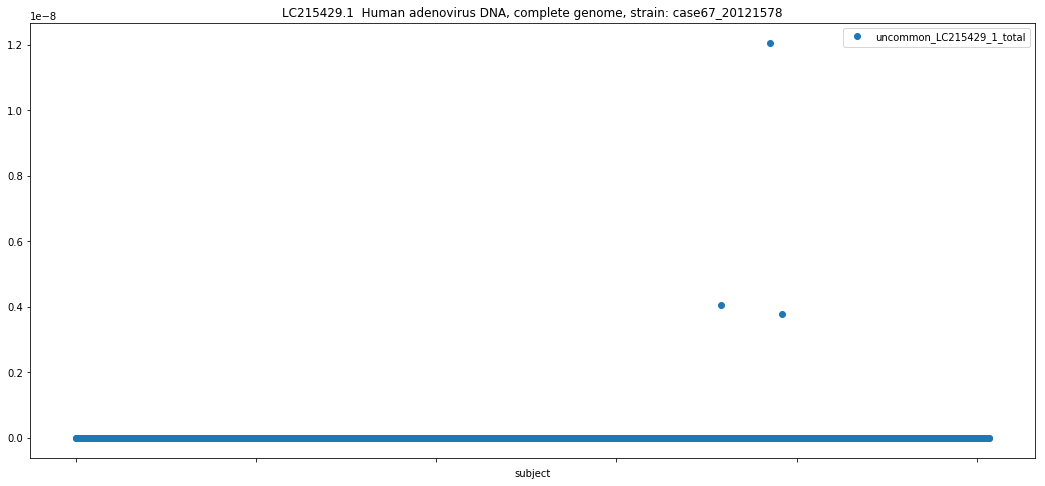

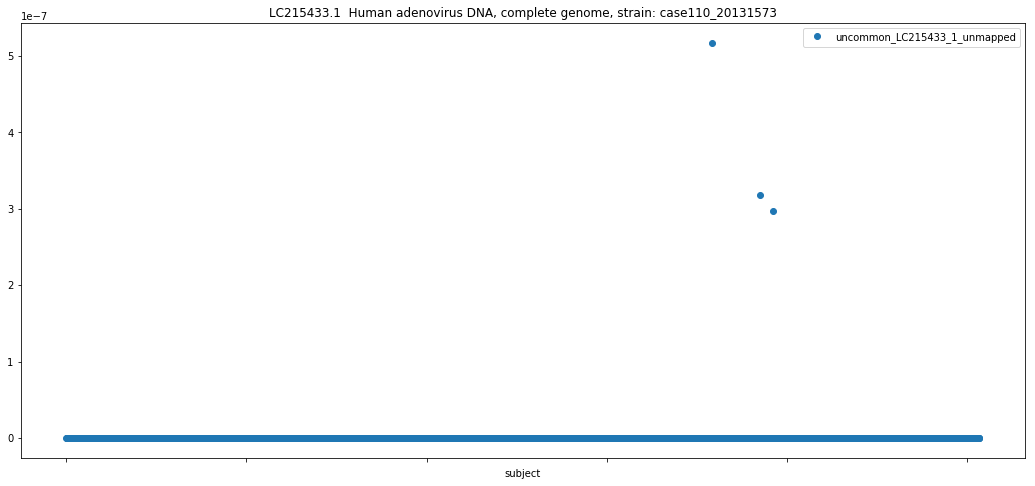

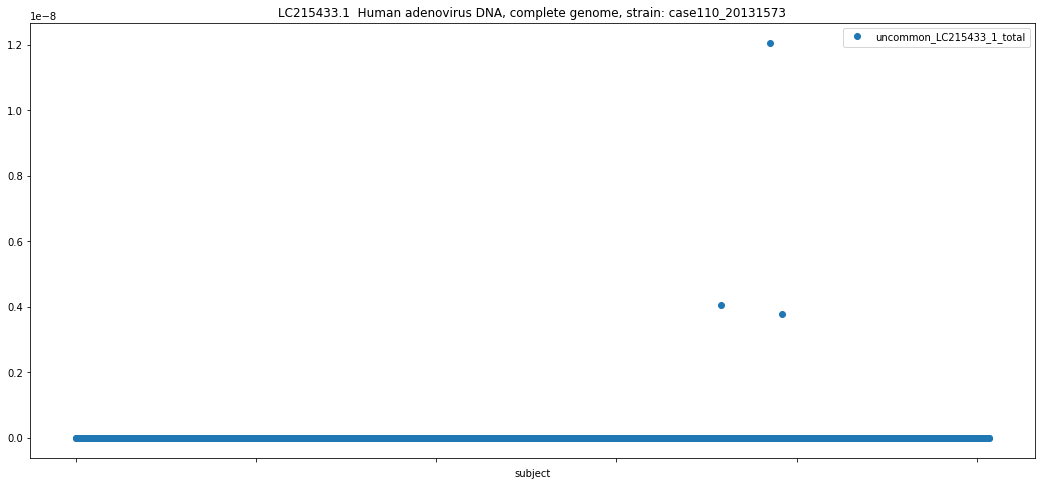

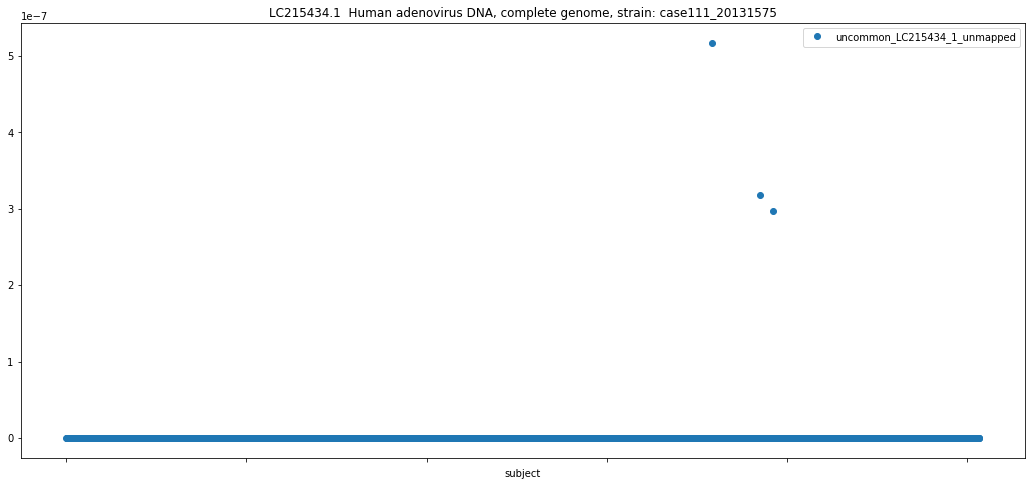

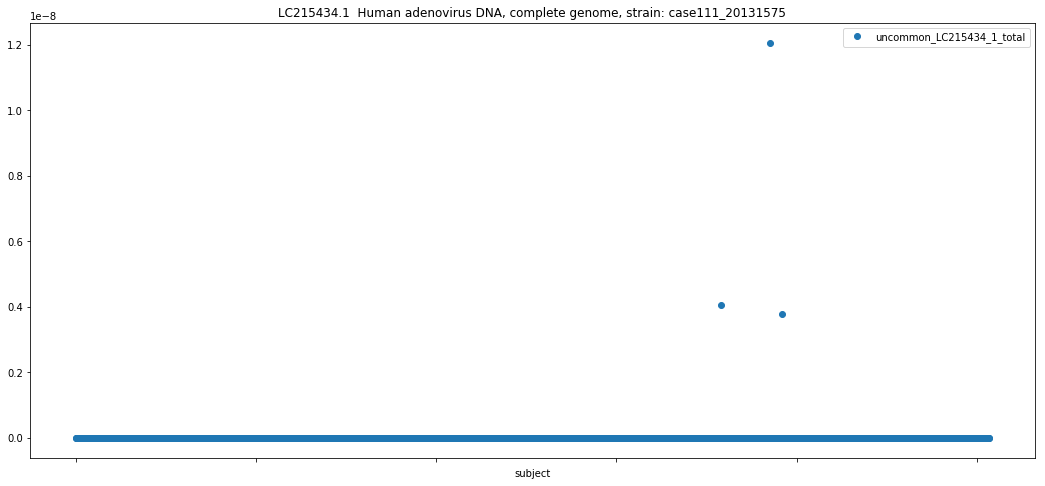

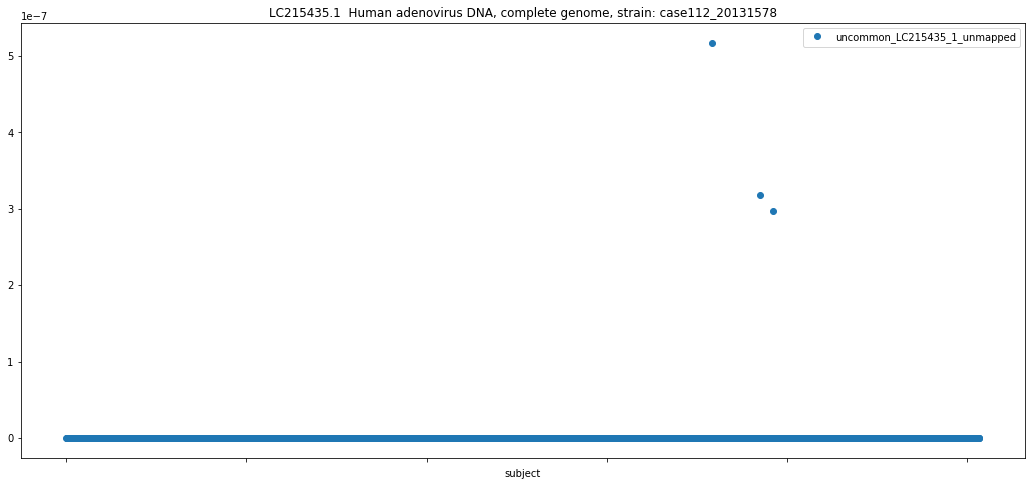

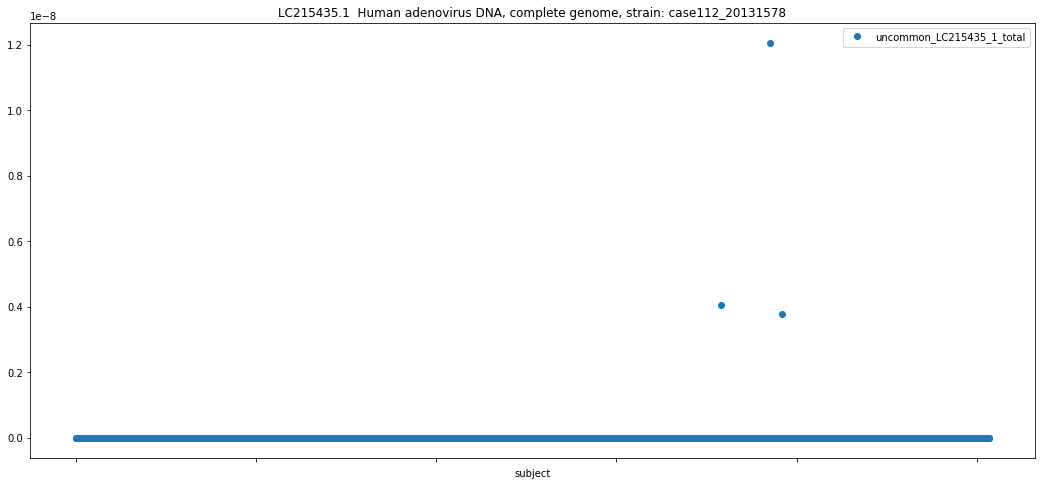

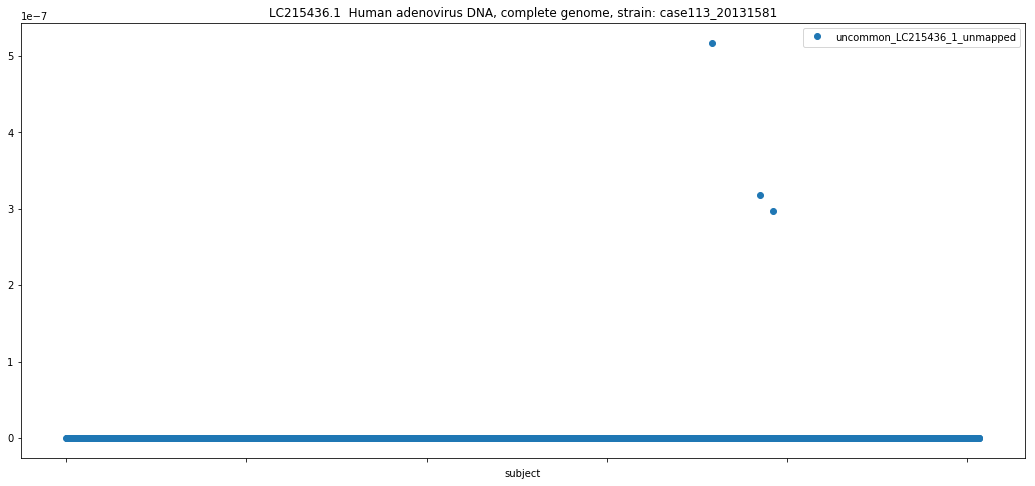

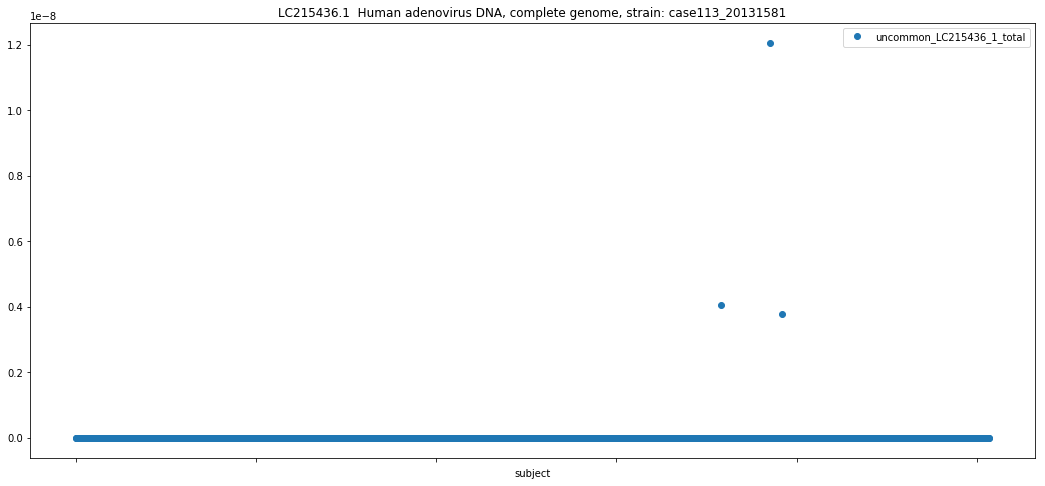

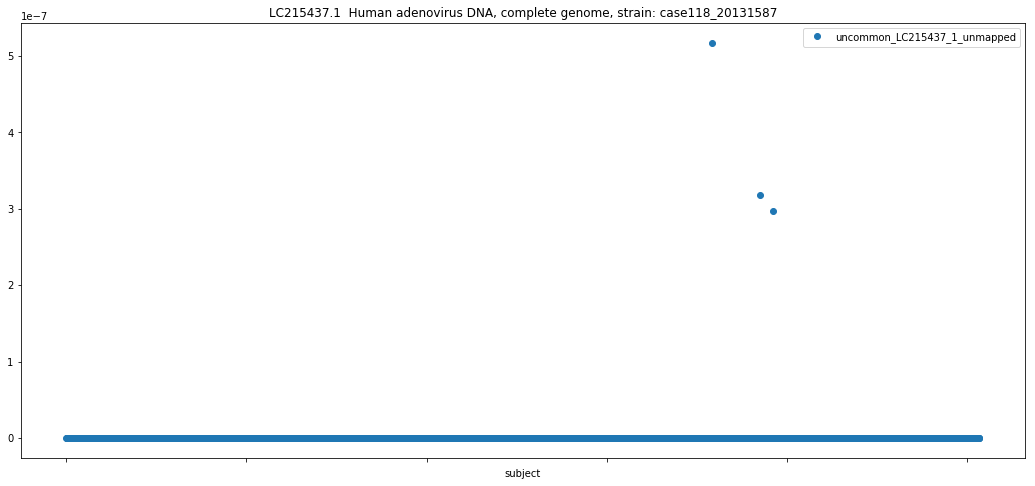

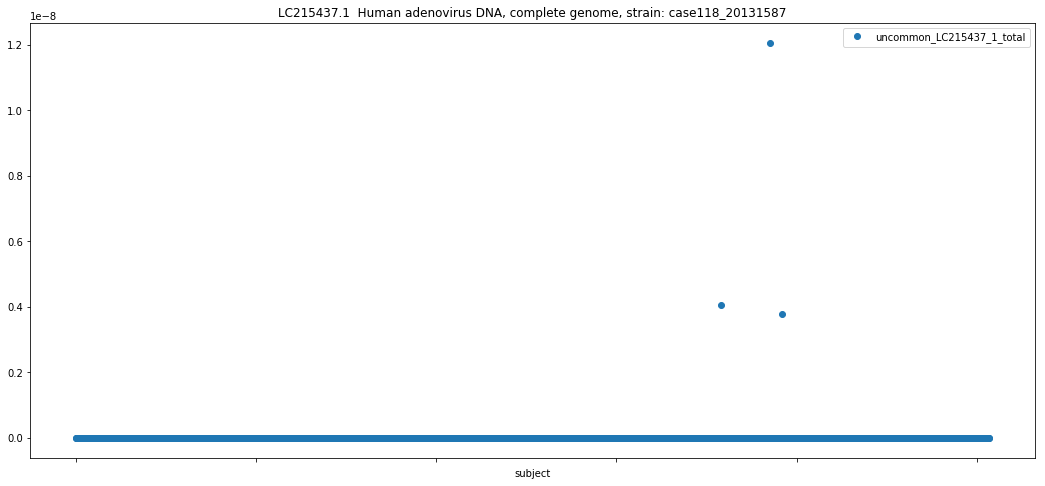

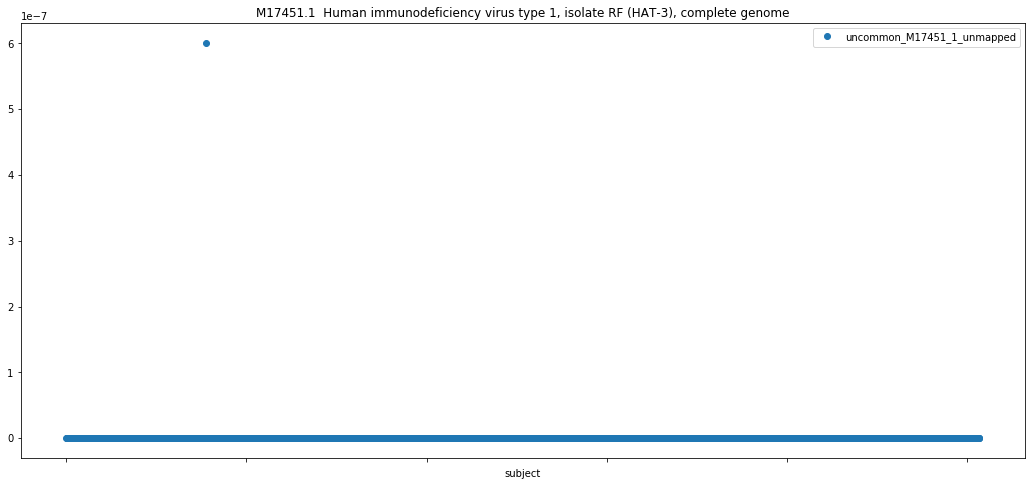

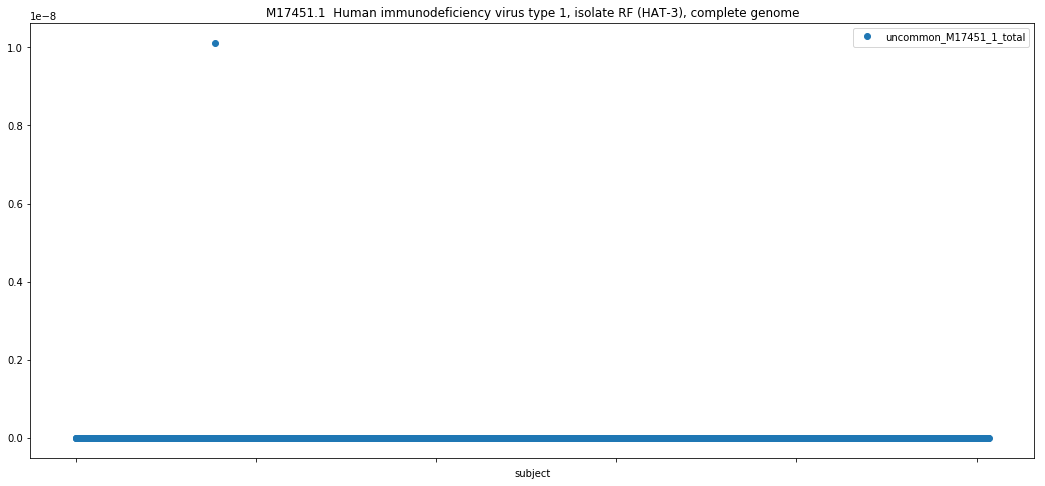

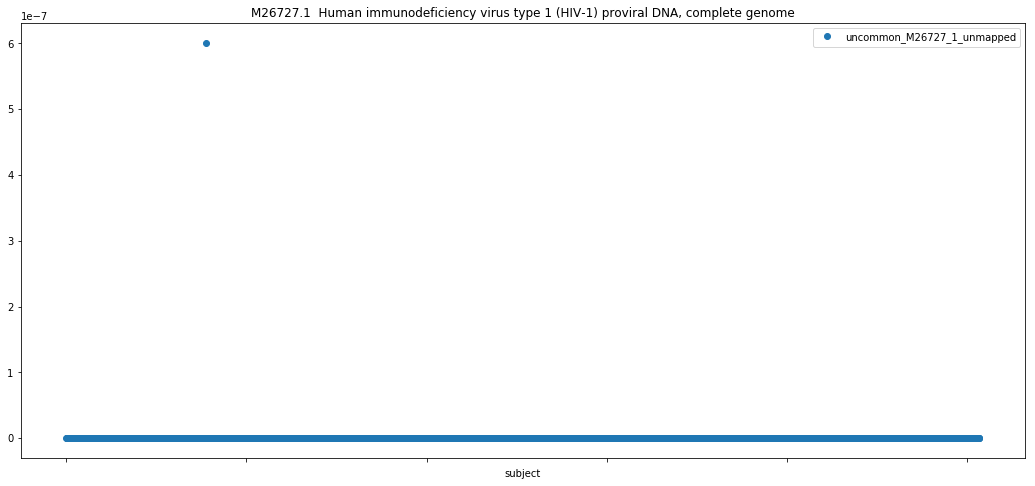

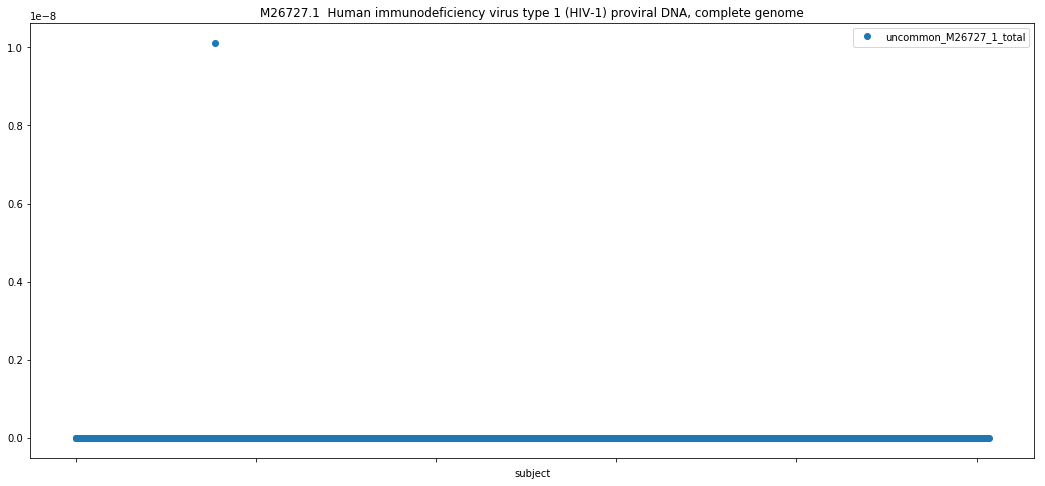

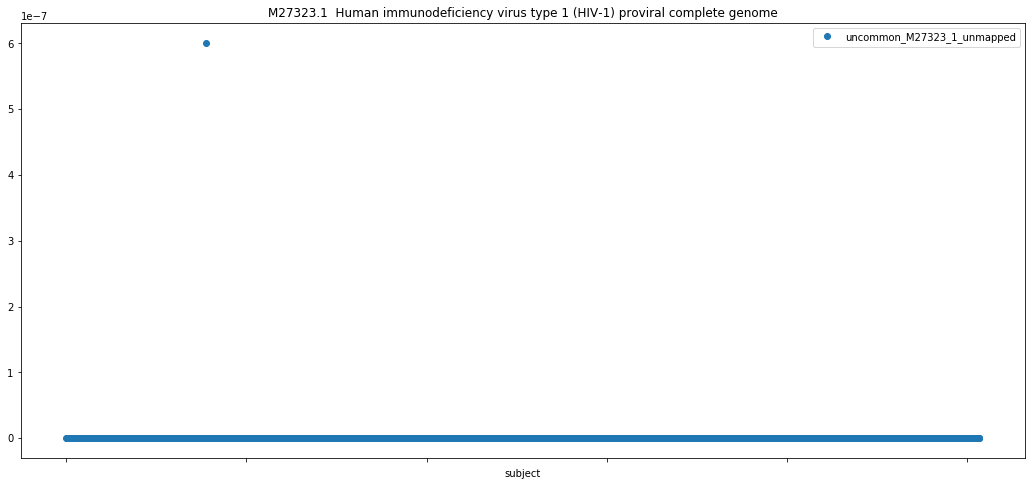

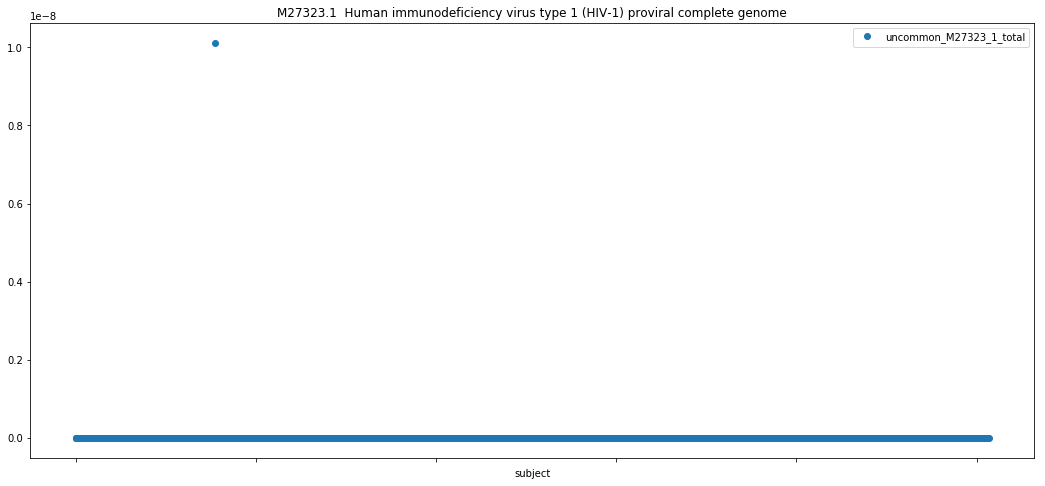

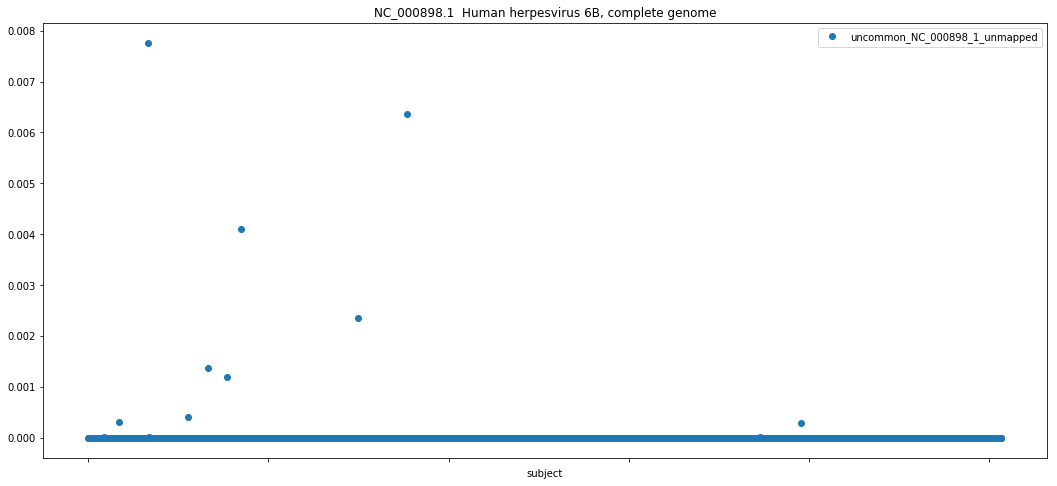

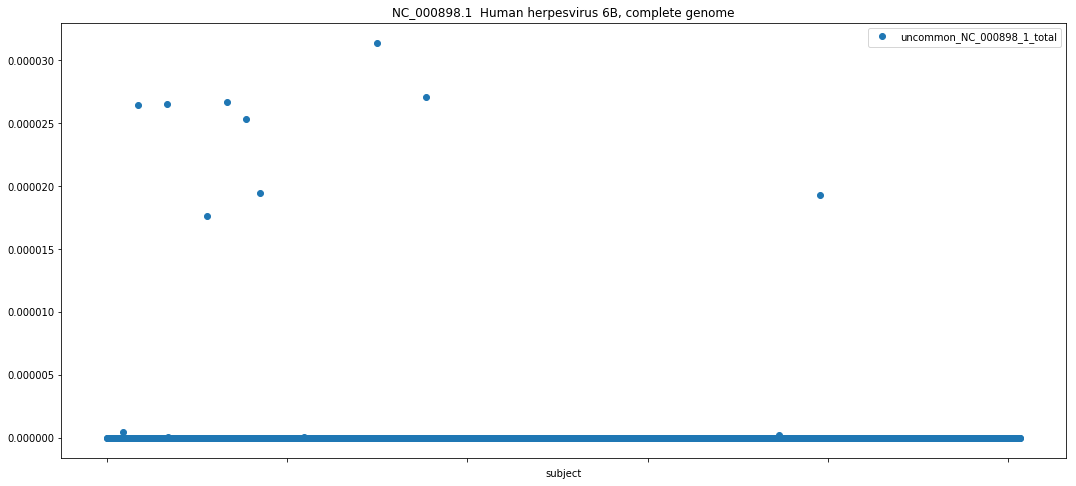

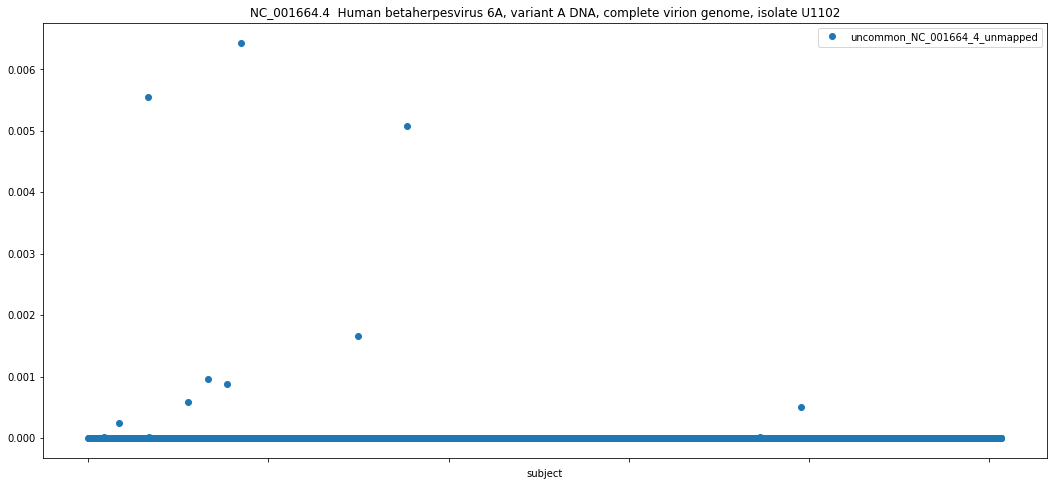

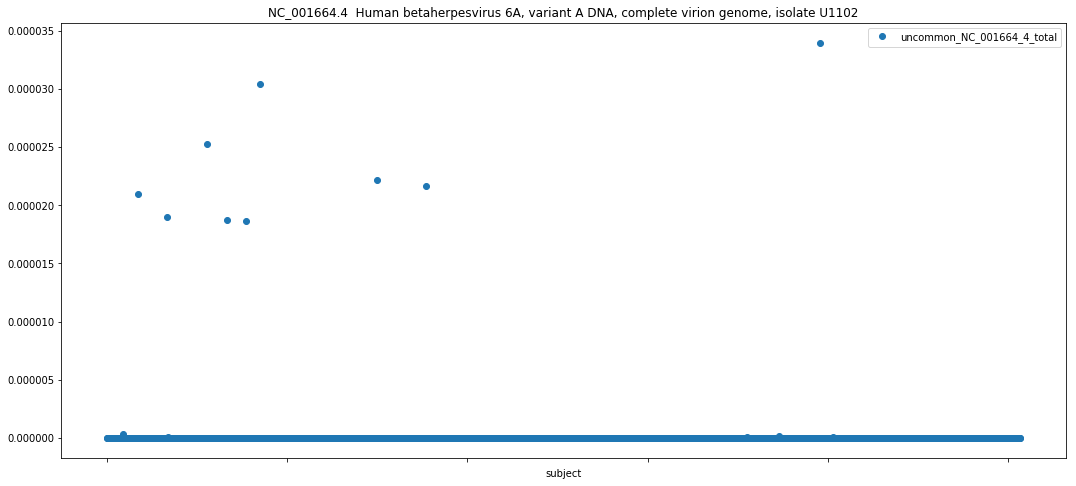

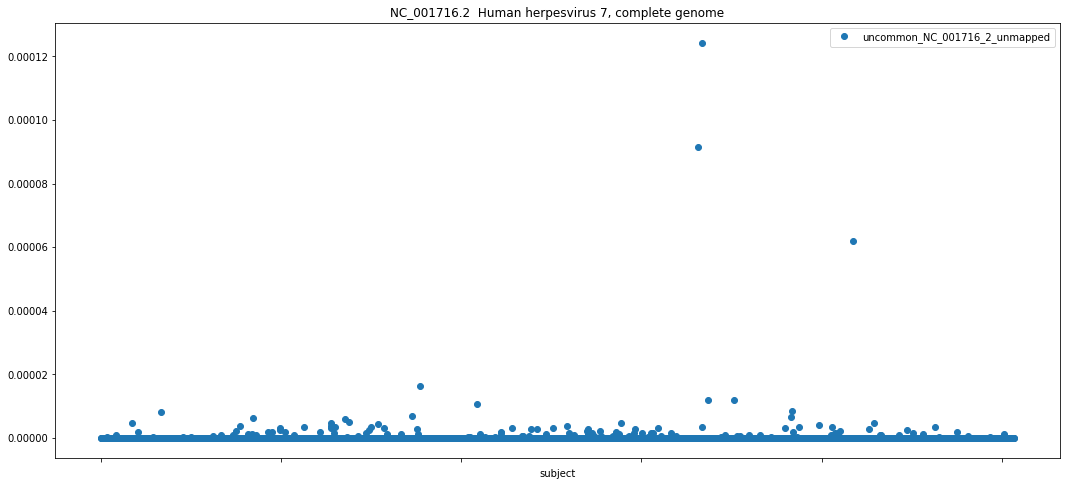

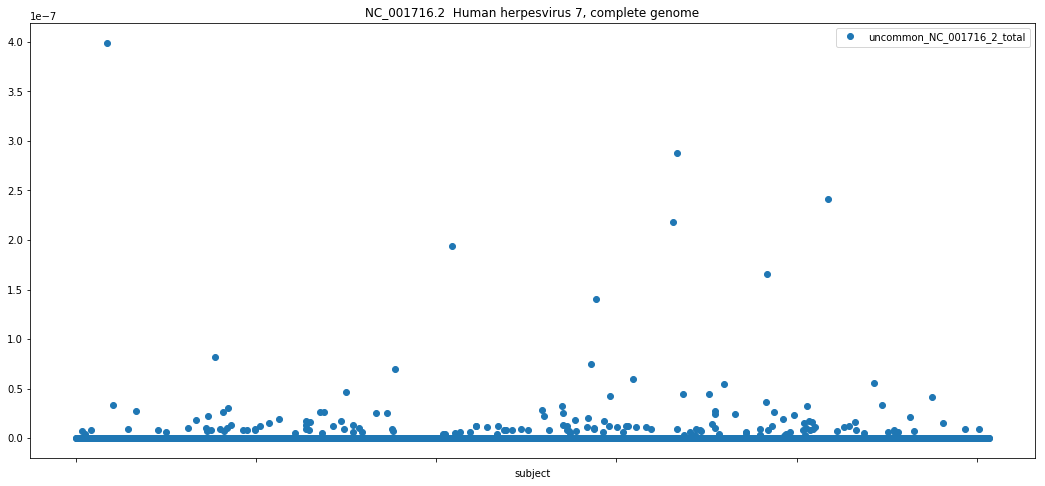

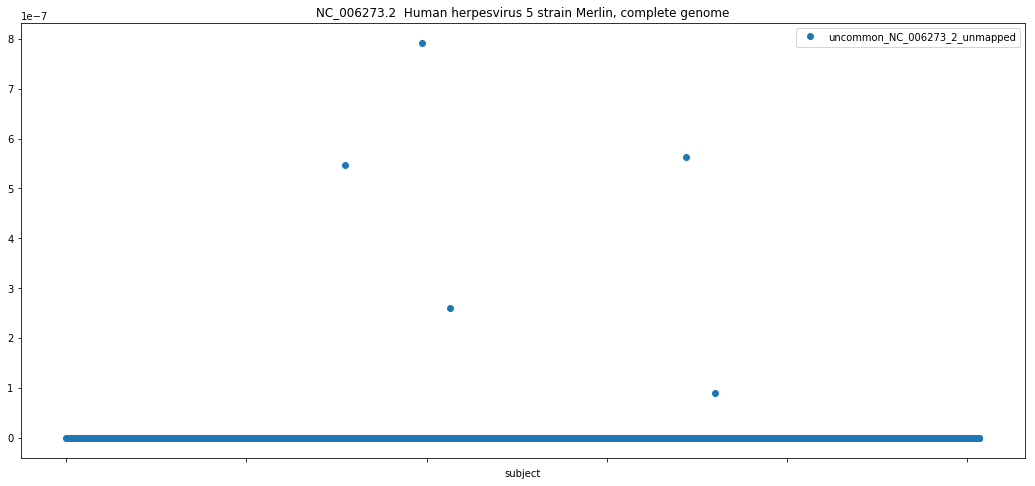

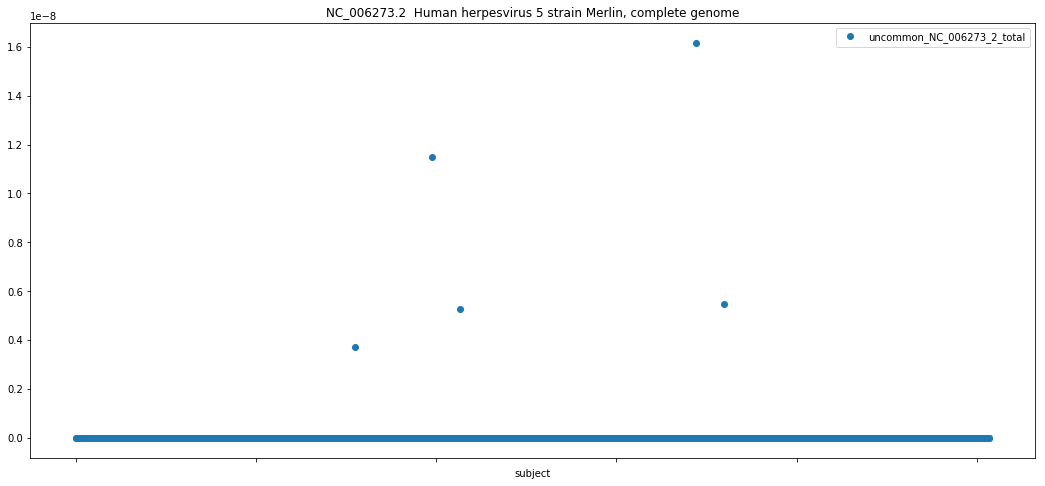

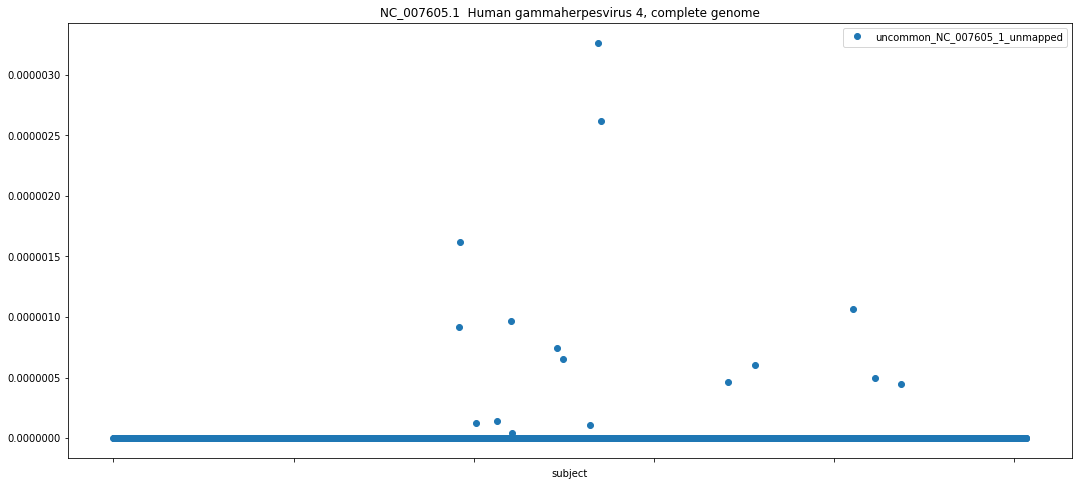

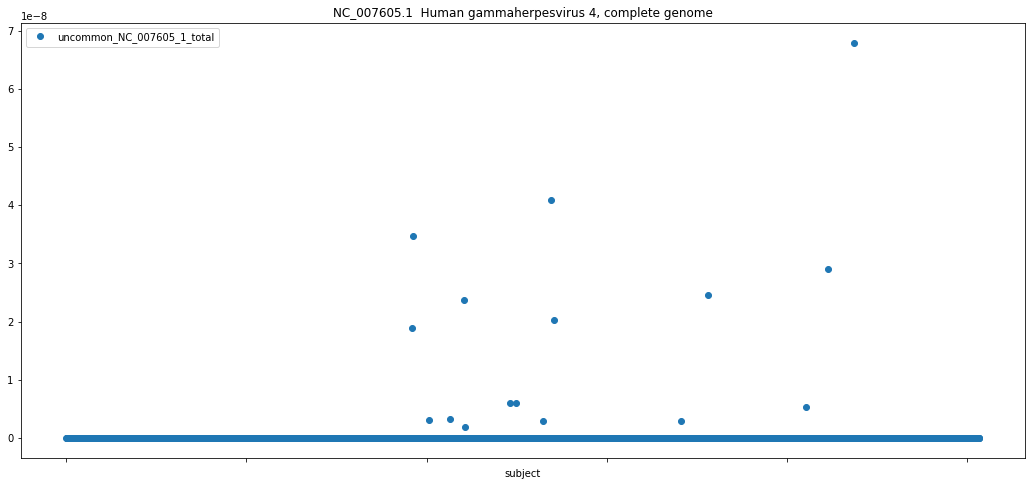

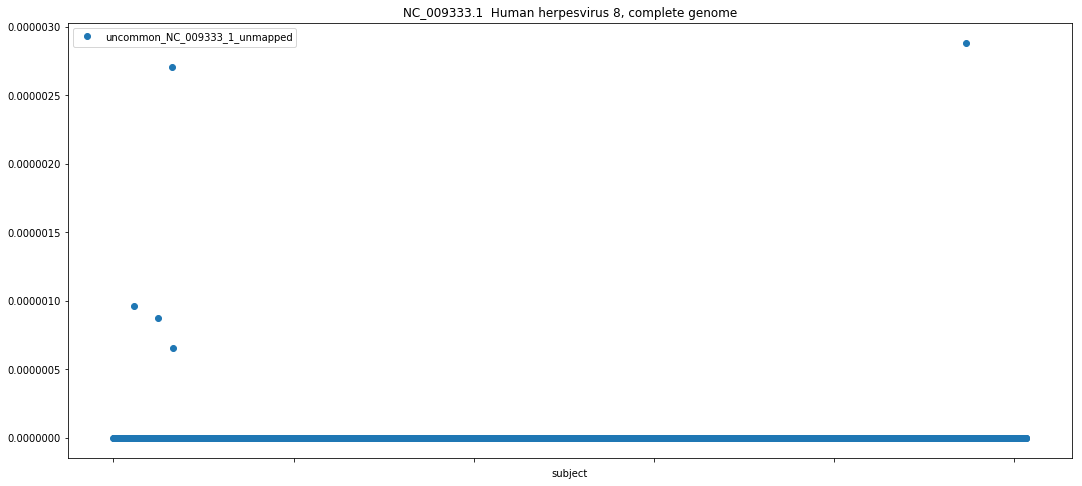

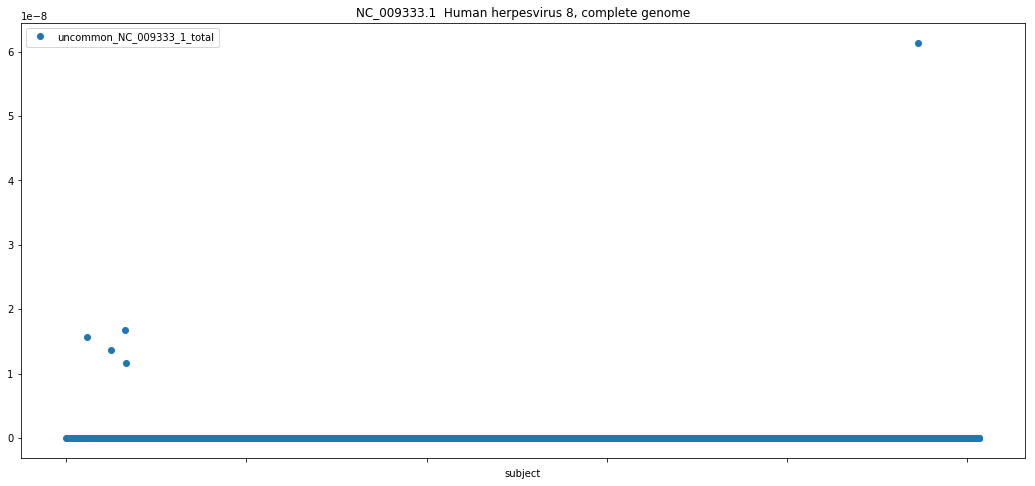

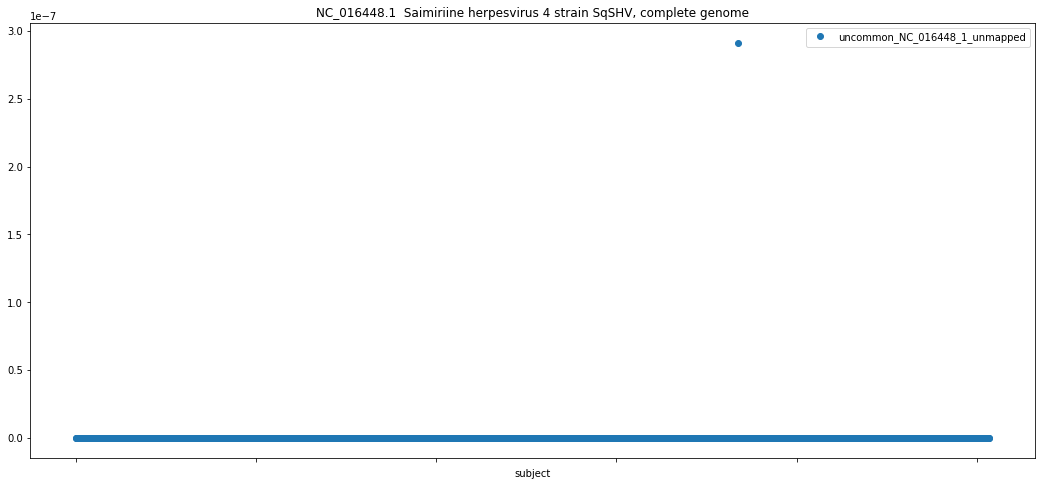

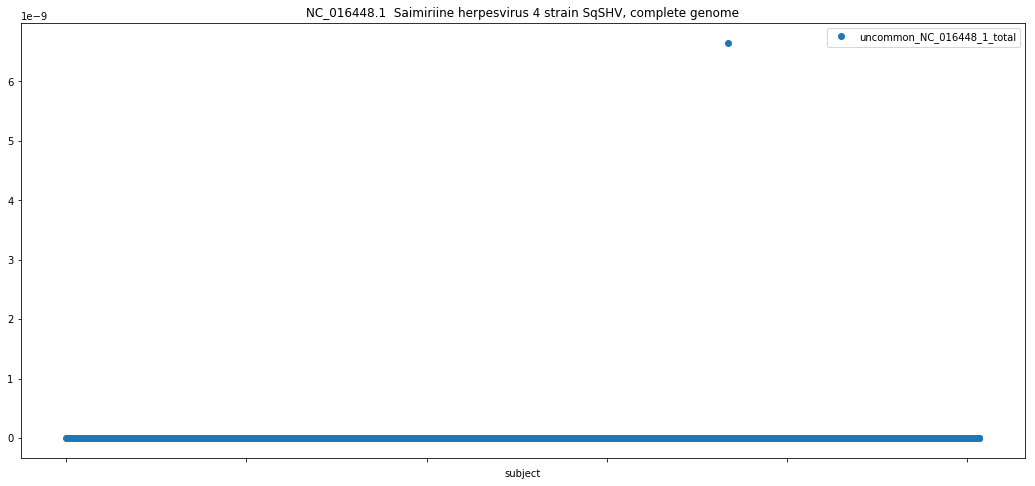

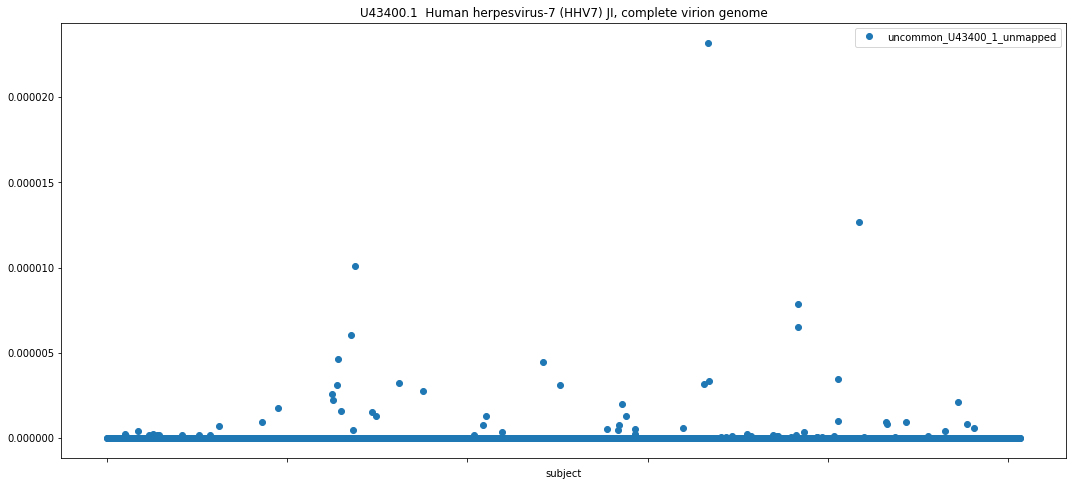

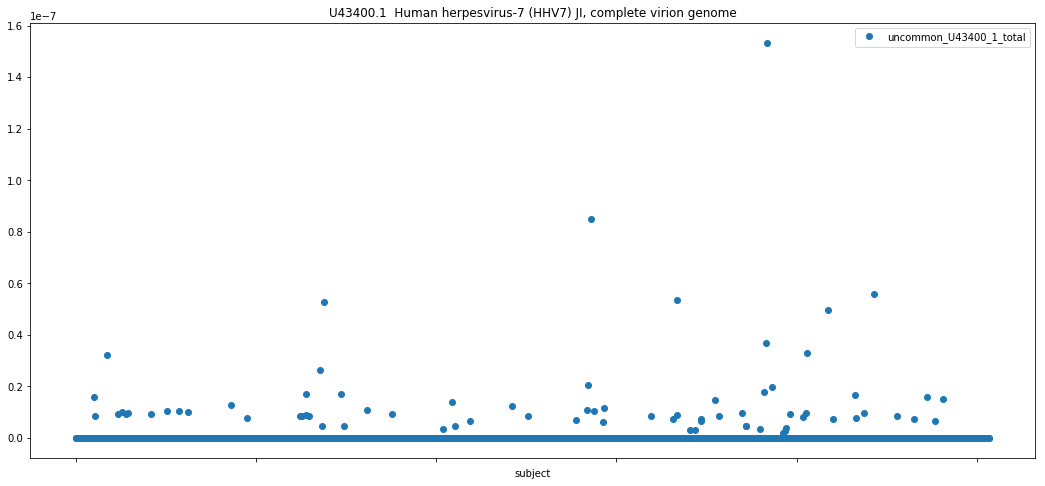

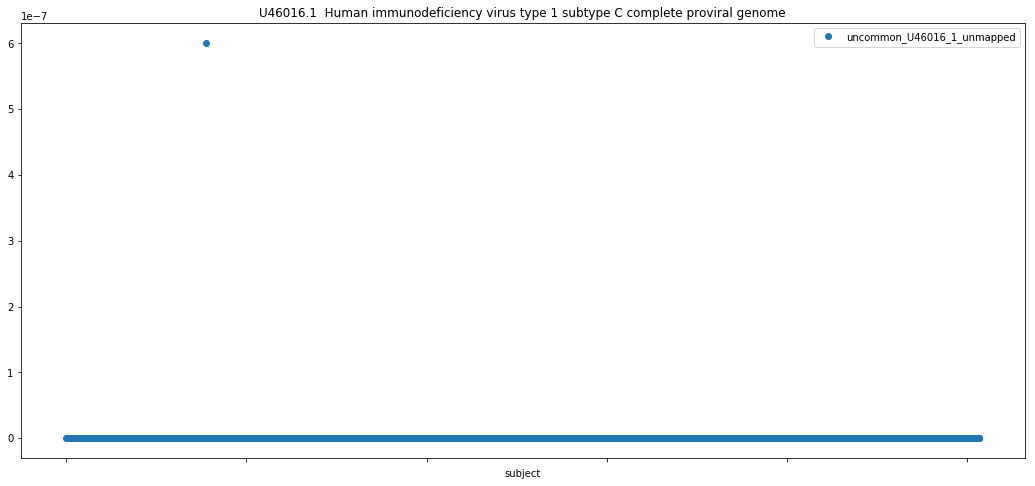

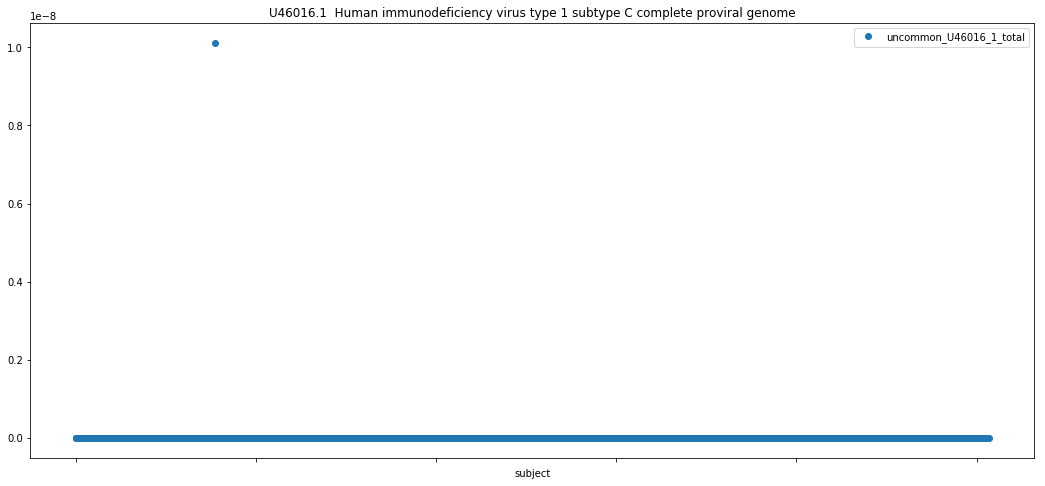

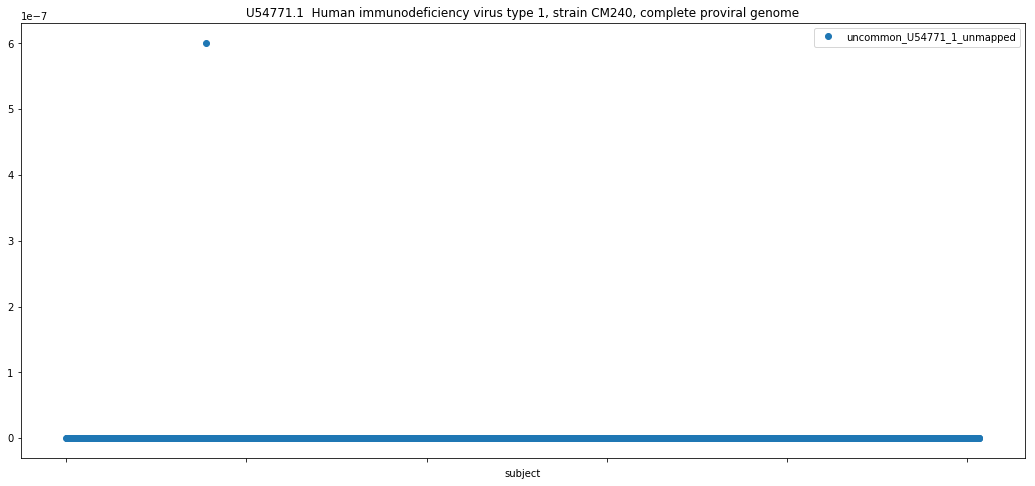

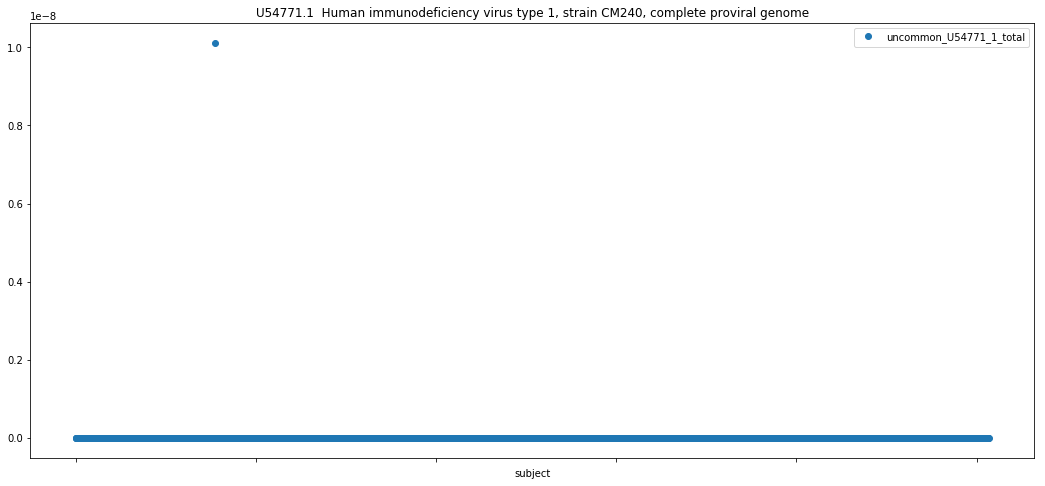

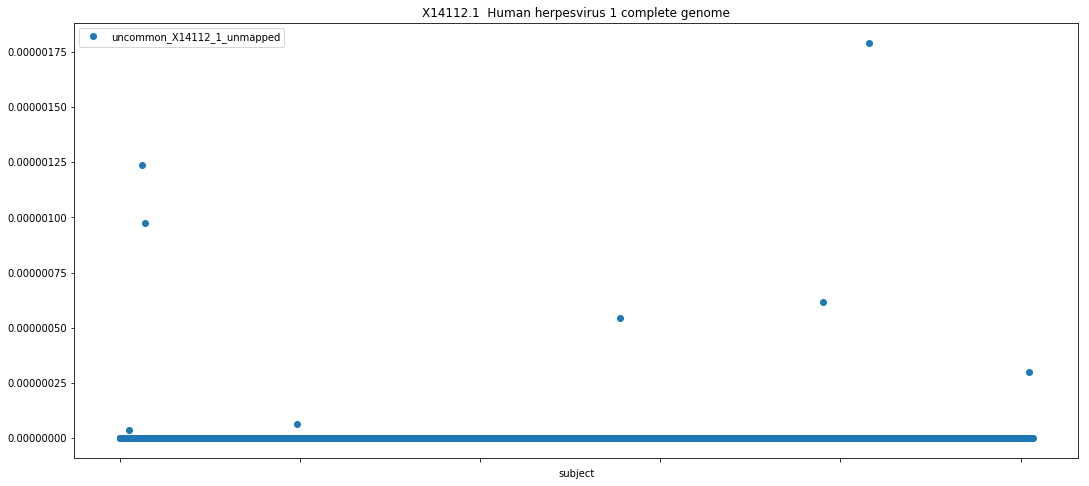

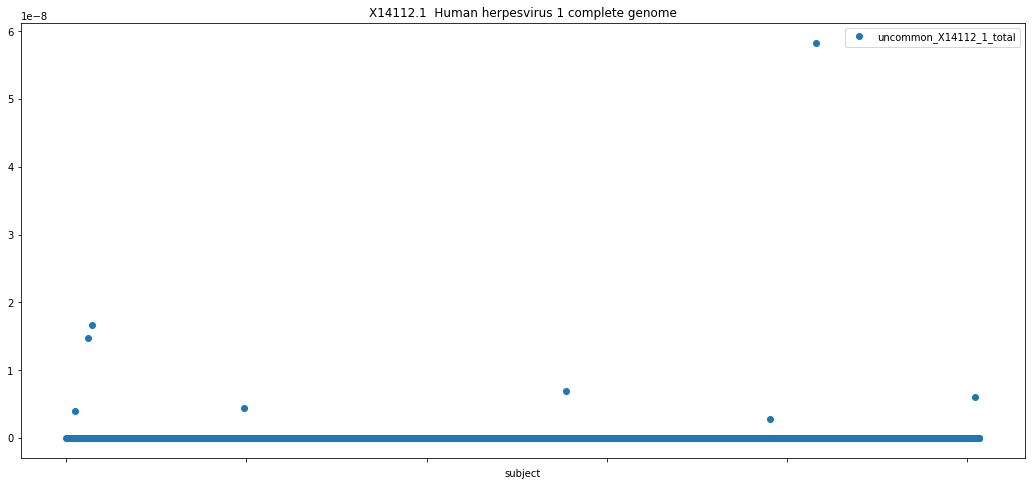

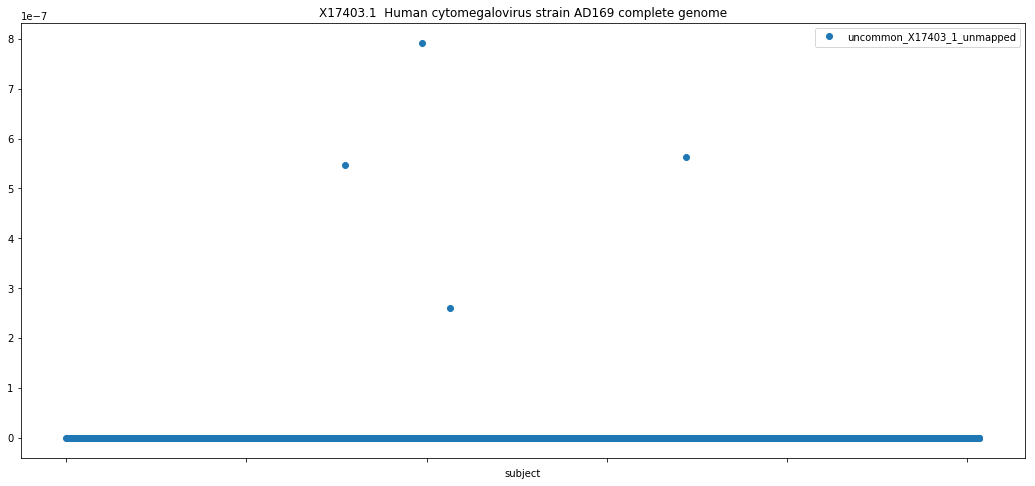

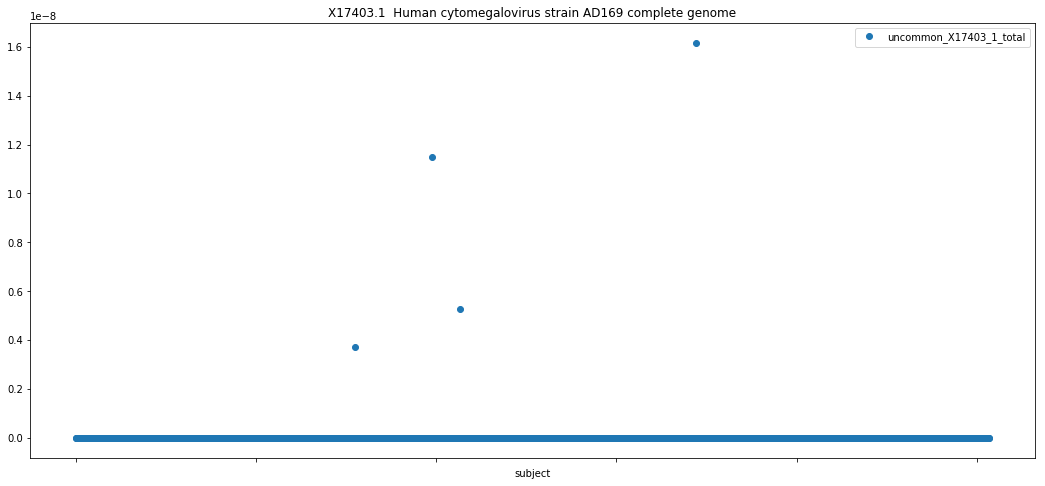

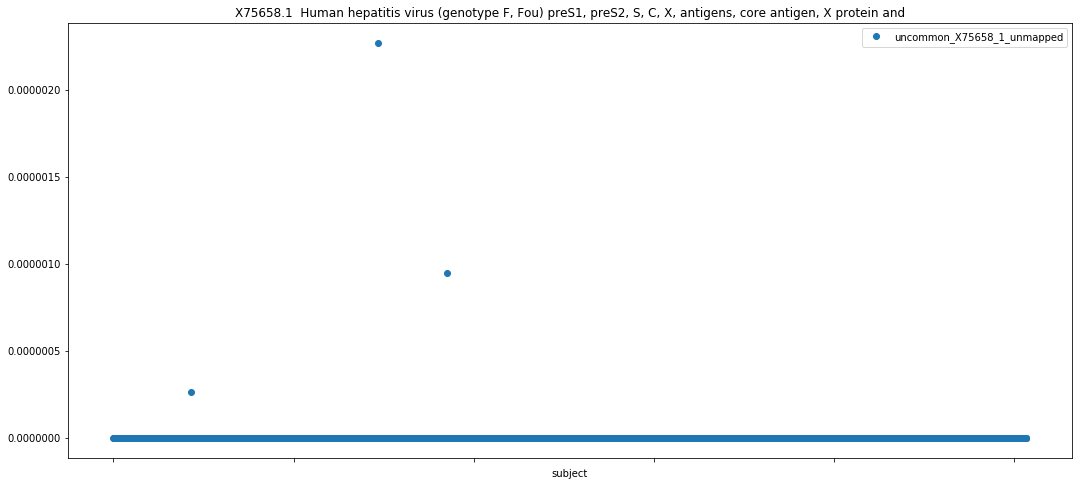

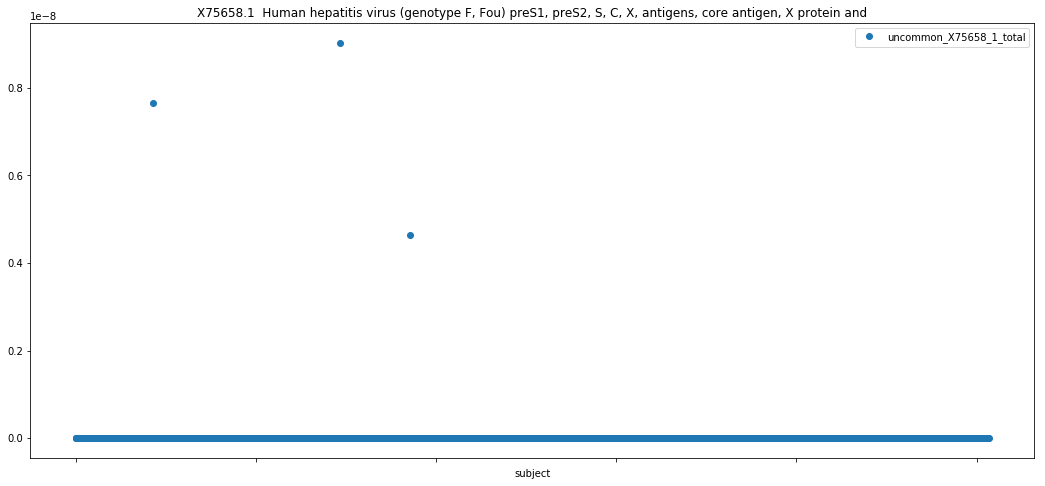

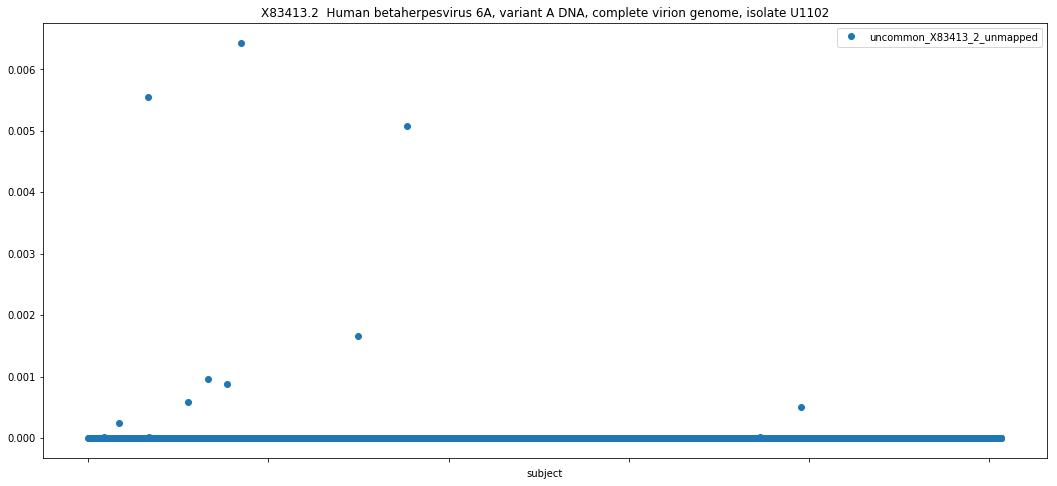

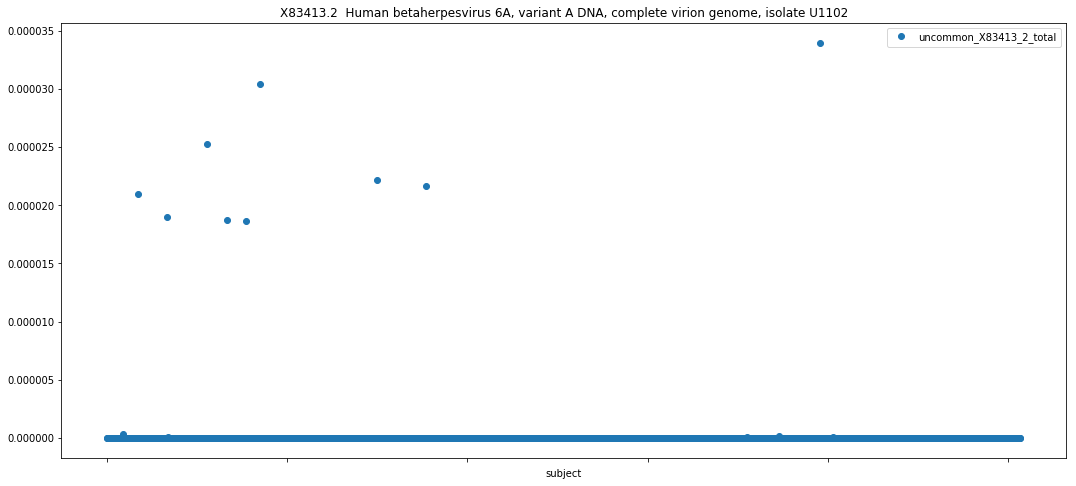

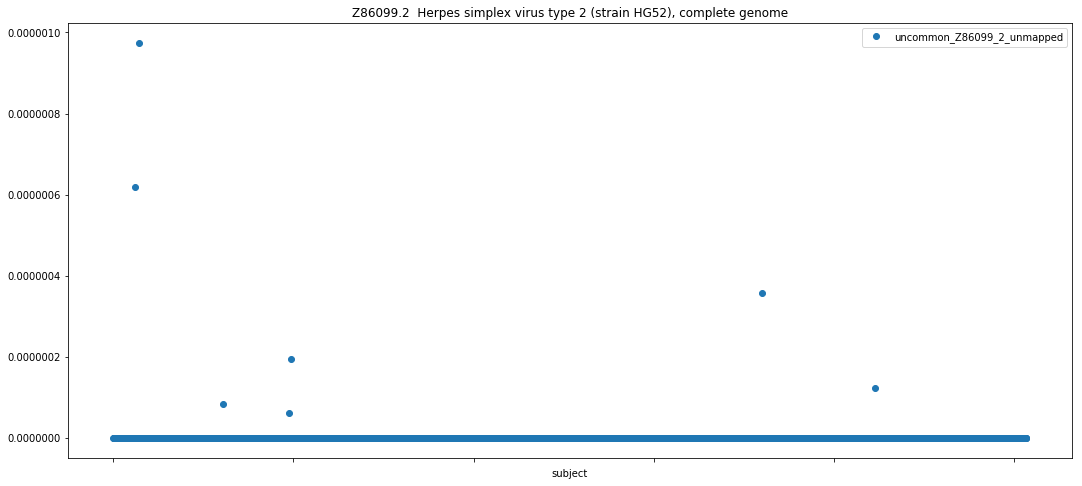

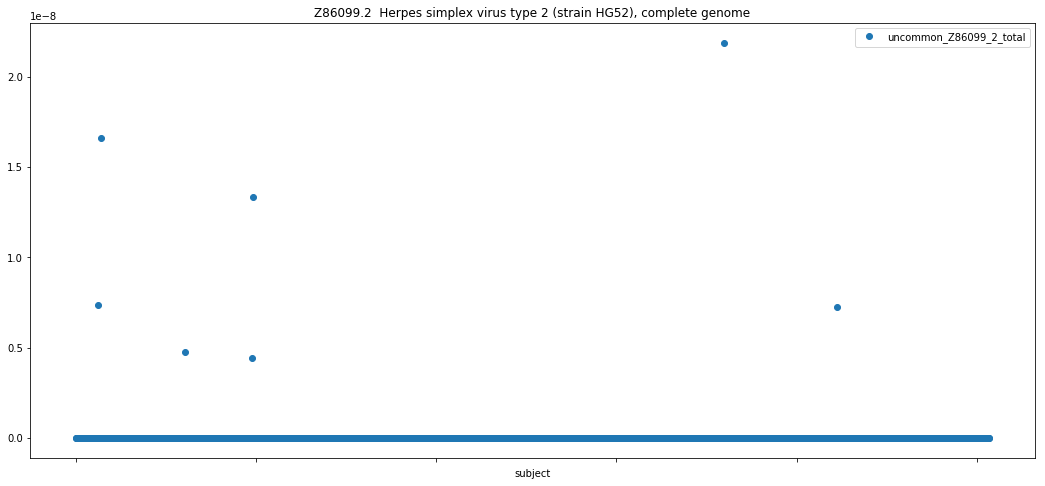

In [7]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    if( df['uncommon_'+tmp+'_unmapped'].max() > 0 ):     
        df.plot( title=accession + "  " + row['description'][:100],marker='o',linewidth=0,
                    logy=False,x='subject',y='uncommon_'+tmp+'_unmapped')
        df.plot( title=accession + "  " + row['description'][:100],marker='o',linewidth=0,
                    logy=False,x='subject',y='uncommon_'+tmp+'_total')


In [8]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    if( df['uncommon_'+tmp+'_unmapped'].max() > 0 ):
        mean=df['uncommon_'+tmp+'_unmapped'].mean()
        std=df['uncommon_'+tmp+'_unmapped'].std()
        print(accession + "  " + row['description'] + "\nmean " + str(mean) + "\tstddev " + str(std))
        s=df[ df['uncommon_'+tmp+'_unmapped'] > ( mean + std )]
        print(len(s))
        print(s['subject'].tolist())
        print()

AB618031.1  Herpes simplex virus (type 1 /strain RH2) DNA, nearly complete genome
mean 2.3290655991105416e-08	stddev 3.3763166702321934e-07
19
['HG00178', 'HG00189', 'HG01796', 'HG02166', 'HG03645', 'HG03652', 'HG03752', 'HG03826', 'NA07357', 'NA11894', 'NA12287', 'NA12776', 'NA18971', 'NA19256', 'NA20510', 'NA20512', 'NA20517', 'NA20519', 'NA20585']

AF037218.1  Human herpesvirus 7 strain RK, complete genome
mean 2.2667898654642423e-07	stddev 3.359271955941751e-06
23
['HG00245', 'HG00362', 'HG01162', 'HG01277', 'HG01813', 'HG01845', 'HG01879', 'HG01896', 'HG02050', 'HG02256', 'HG02301', 'HG02660', 'HG03376', 'HG03754', 'HG04202', 'HG04227', 'NA10847', 'NA12813', 'NA18916', 'NA18917', 'NA19020', 'NA19204', 'NA19391']

AF148805.2  Human herpesvirus 8 strain GK18, complete genome
mean 9.383185897356541e-09	stddev 3.4593871332166826e-07
8
['HG00115', 'HG00306', 'HG00357', 'HG00464', 'HG03311', 'HG03557', 'NA18570', 'NA20806']

AP015015.1  Human herpesvirus 4 DNA, complete genome, strain: 